In [1]:
import numpy as np
import sys
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import glob

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# VEST NC 2020

## VEST's Documentation File

Election results and precinct shapefile from the NC State Board of Elections (https://www.ncsbe.gov/results-data)

Buncombe 681, Henderson CV, Wake 01-07A, 07-07A are missing from the 20201018 shapefile. They are added from the 20190827 shapefile.

North Carolina produces two sets of election results data. The precinct results are the unaltered results as initially reported by the counties. Many counties report early votes by vote center while provisional and other nonstandard ballots may be reported countywide. The precinct-sorted results are then produced within 30 days after the election. In the precinct-sorted data nearly all votes are assigned to precincts regardless of the manner by which the ballots were cast. However, North Carolina law requires the addition of statistical "noise" to the precinct-sorted data wherever any given vote by any specific voter may otherwise be deduced via cross referencing the various election-related data sets produced by the SBE.

For the 2020 general election 51 counties reported all votes by precinct in their initial precinct results. The precinct-sorted data set was used instead for the counties listed below.

Alleghany, Avery, Beaufort, Bertie\*, Bladen, Buncombe, Cabarrus, Caldwell, Camden, Currituck, Dare, Davidson\*, Davie, Duplin\*, Durham\*, Edgecombe, Guilford, Halifax\*, Harnett, Haywood, Henderson, Hertford, Hyde, Johnston, Jones, Lee, Lincoln, Macon, Martin, Mecklenburg\*, Moore, Nash, New Hanover\*, Northampton\*, Orange, Pasquotank, Pitt\*, Polk, Richmond, Scotland, Stokes\*, Surry\*, Tyrrell\*, Wake, Washington, Watauga, Wayne, Wilkes\*, Yadkin

In counties marked by asterisk some votes were still reported by vote center or countywide in the precinct-sorted data. These were distributed by candidate to precincts based on the precinct-level reported vote. The precinct-sorted results were further adjusted to match the certified countywide totals based on the precinct-level vote by candidate.

G20PRERTRU - Donald J. Trump (Republican Party)  
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREGHAW - Howie Hawkins (Green Party)  
G20PRECBLA - Don Blankenship (Constitution Party)  
G20PREOWRI - Write-in Votes  

G20USSRTIL - Thom Tillis (Republican Party)  
G20USSDCUN - Cal Cunningham (Democratic Party)  
G20USSLBRA - Shannon W. Bray (Libertarian Party)  
G20USSCHAY - Kevin E. Hayes (Constitution Party)  

G20GOVRFOR - Dan Forest (Republican Party)  
G20GOVDCOO - Roy Cooper (Democratic Party)  
G20GOVLDIF - Steven K. DiFiore (Libertarian Party)  
G20GOVCPIS - Al Pisano (Constitution Party)  

G20LTGRROB - Mark Robinson (Republican Party)  
G20LTGDHOL - Yvonne Lewis Holley (Democratic Party)  

G20ATGRONE - Jim O'Neill (Republican Party)  
G20ATGDSTE - Josh Stein (Democratic Party)  

G20TRERFOL - Dale R. Folwell (Republican Party)  
G20TREDCHA - Ronnie Chatterji (Democratic Party)  

G20SOSRSYK - E.C. Sykes (Republican Party)  
G20SOSDMAR - Elaine Marshall (Democratic Party)  

G20AUDRSTR - Anthony Wayne (Tony) Street (Republican Party)  
G20AUDDWOO - Beth A. Wood (Democratic Party)  

G20AGRRTRO - Steve Troxler (Republican Party)  
G20AGRDWAD - Jenna Wadsworth (Democratic Party)  

G20INSRCAU - Mike Causey (Republican Party)  
G20INSDGOO - Wayne Goodwin (Democratic Party)  

G20LABRDOB - Josh Dobson (Republican Party)  
G20LABDHOL - Jessica Holmes (Democratic Party)  

G20SPIRTRU - Catherine Truitt (Republican Party)  
G20SPIDMAN - Jen Mangrum (Democratic Party)  

G20SSCRNEW - Paul Newby (Republican Party)  
G20SSCDBEA - Cheri Beasley (Democratic Party)  

G20SSCRBER - Phil Berger, Jr. (Republican Party)  
G20SSCDINM - Lucy Inman (Democratic Party)  

G20SSCRBAR - Tamara Barringer (Republican Party)  
G20SSCDDAV - Mark Davis (Democratic Party)  

G20SACRWOO - April C. Wood (Republican Party)  
G20SACDSHI - Tricia Shields (Democratic Party)  

G20SACRGOR - Fred Gore (Republican Party)  
G20SACDCUB - Lora Christine Cubbage (Democratic Party)  

G20SACRDIL - Chris Dillon (Republican Party)  
G20SACDSTY - Gray Styers (Democratic Party)  

G20SACRCAR - Jeff Carpenter (Republican Party)  
G20SACDYOU - Reuben F. Young (Democratic Party)  

G20SACRGRI - Jefferson G. Griffin (Republican Party)  
G20SACDBRO - Chris Brook (Democratic Party)  

## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/nc_2020/nc_2020.shp")

In [3]:
vest_shp.shape

(2662, 53)

In [4]:
#vest_shp.head(1)

<AxesSubplot:>

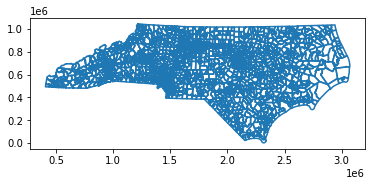

In [5]:
vest_shp.boundary.plot()

# Election Results

## Load in Election Results

Downloaded SOS Election Results using the same file linked by VEST.

In [6]:
election_results = pd.read_csv('./raw-from-source/SOS/results_pct_20201103/results_pct_20201103.txt', sep='\t', lineterminator='\n')

In [7]:
election_results.sort_values(by=['County', 'Precinct','Contest Name']).head(1)

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,\r
32933,ALAMANCE,11/03/2020,01,1,C,ALAMANCE COUNTY BOARD OF COMMISSIONERS,Bob Byrd,DEM,3,92,311,167,1,571,Y,\r


In [8]:
#Read in Sorted precinct files for counties listed by VEST
path = "./raw-from-source/SOS/results_pct_20201103/County Results"
  
# csv files in the path
files = glob.glob(path + "/*.txt")
  
# defining an empty list to store 
# content
nc_2020_counties = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    nc_2020_counties = pd.read_csv(filename, sep='\t', lineterminator='\n')
    content.append(nc_2020_counties)
    
# converting content to data frame
df_2020_cnty = pd.concat(content)
print(df_2020_cnty.shape)
df_2020_cnty.head(1)

(1498584, 19)


,county_id,county,election_dt,result_type_lbl,result_type_desc,contest_id,contest_title,contest_party_lbl,contest_vote_for,precinct_code,precinct_name,candidate_id,candidate_name,candidate_party_lbl,group_num,group_name,voting_method_lbl,voting_method_rslt_desc,vote_ct\r
0,77,RICHMOND,11/03/2020,STD,<NORMAL>,654,RICHMOND COUNTY BOARD OF COMMISSIONERS,NaN,3,01,ROCKINGHAM #1,1689,Andy Grooms,REP,2,ELECTION DAY,V,Election Day,145


In [9]:
#Get counties using Sorted files and remove from state file
counties = df_2020_cnty.county.unique()
df_2020_cnty.columns = ["county_id","County","Election Date","result_type_lbl","result_type_desc","contest_id","Contest Name","Choice Party","contest_vote_for","Precinct","Precinct Name","candidate_id","Choice","Choice Party","group_num","group_name","voting_method","voting method_rslt","Total Votes"]
election_results = election_results[~election_results['County'].isin(counties)]

In [10]:
#Sum precinct votes for candidates
df_2020_cnty = df_2020_cnty.groupby(['County', 'Contest Name', 'Precinct', 'Choice'])["Total Votes"].sum().reset_index()

In [11]:
election_results = pd.concat([election_results,df_2020_cnty], axis=0, ignore_index=True)

In [12]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="North Carolina"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Make FIPS County Name uppercase
fips_file['County Name']=fips_file['County Name'].str.upper()

#Create the dictionary
nc_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))
#Create list of fips codes
fips_file["unique_ID"] =  "37" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

In [13]:
#Combine Presidential Write In votes
election_results.loc[(election_results['Choice'] == "Write-In (Miscellaneous)") & (election_results["Contest Name"] == "US PRESIDENT"), "Choice"] = "Write-In Votes"
election_results.loc[(election_results['Choice'] == "Jade Simmons (Write-In)") & (election_results["Contest Name"] == "US PRESIDENT"), "Choice"] = "Write-In Votes"

In [14]:
#Create a list of candidates from the VEST documentation

# List of candidates names from VEST documentation
office_list = ['Donald J. Trump','Joseph R. Biden','Jo Jorgensen','Howie Hawkins','Don Blankenship',"Write-In Votes",'Thom Tillis',
        'Cal Cunningham','Shannon W. Bray','Kevin E. Hayes','Dan Forest','Roy Cooper','Steven J. DiFiore','Al Pisano','Mark Robinson','Yvonne Lewis Holley',"Jim O'Neill",'Josh Stein','Dale R. Folwell','Ronnie Chatterji','E.C. Sykes','Elaine Marshall','Anthony Wayne (Tony) Street','Beth A. Wood','Steve Troxler','Jenna Wadsworth','Mike Causey','Wayne Goodwin','Josh Dobson','Jessica Holmes','Catherine Truitt','Jen Mangrum','Paul Newby','Cheri Beasley','Phil Berger, Jr.','Lucy Inman','Tamara Barringer','Mark Davis','April C. Wood','Tricia Shields','Fred Gore','Lora Christine Cubbage','Chris Dillon','Gray Styers','Jeff Carpenter','Reuben F. Young','Jefferson G. Griffin','Chris Brook']
office_list = sorted(office_list)

In [15]:
election_results = election_results[election_results["Choice"].isin(office_list)]

In [16]:
election_results["Choice"].unique()

array(['Jen Mangrum', 'Jessica Holmes', 'Chris Dillon', 'Donald J. Trump',
       'Cheri Beasley', 'Paul Newby', 'April C. Wood', 'Josh Stein',
       'Steve Troxler', 'Phil Berger, Jr.', 'Thom Tillis',
       'Jefferson G. Griffin', 'Lucy Inman', 'Cal Cunningham',
       'E.C. Sykes', 'Wayne Goodwin', 'Write-In Votes', 'Kevin E. Hayes',
       'Fred Gore', 'Gray Styers', 'Jeff Carpenter',
       'Anthony Wayne (Tony) Street', 'Tricia Shields', 'Mike Causey',
       'Tamara Barringer', 'Reuben F. Young', 'Howie Hawkins',
       'Ronnie Chatterji', 'Chris Brook', 'Steven J. DiFiore',
       'Josh Dobson', 'Dan Forest', "Jim O'Neill",
       'Lora Christine Cubbage', 'Al Pisano', 'Dale R. Folwell',
       'Jenna Wadsworth', 'Mark Robinson', 'Catherine Truitt',
       'Elaine Marshall', 'Don Blankenship', 'Joseph R. Biden',
       'Roy Cooper', 'Beth A. Wood', 'Mark Davis', 'Jo Jorgensen',
       'Yvonne Lewis Holley', 'Shannon W. Bray'], dtype=object)

In [17]:
#Add FIPS columns
election_results["COUNTYFP10"] = election_results["County"].map(nc_fips_dict).fillna(election_results["County"])
vest_shp["COUNTYFP10"] = vest_shp['COUNTY_NAM'].map(nc_fips_dict).fillna(vest_shp['COUNTY_NAM'])

In [18]:
#Clean up precinct column by stripping the white space
election_results["Precinct"]=election_results["Precinct"].str.strip()

#Create a column to pivot table by concatenation the FIPS and precinct columns
election_results["pivot_col"]=election_results["COUNTYFP10"]+election_results["Precinct"]

In [19]:
#Run the pivot
pivoted_election_results = pd.pivot_table(election_results,values=["Total Votes"],index=["pivot_col"],columns=["Choice"],aggfunc=sum)

#Fill in N/A with 0
pivoted_election_results = pivoted_election_results.fillna(0)

#Clean the columns
pivoted_election_results.reset_index(drop=False,inplace=True)
pivoted_election_results.columns = pivoted_election_results.columns.droplevel(0)

In [20]:
pivoted_election_results.head(1)

Choice,,Al Pisano,Anthony Wayne (Tony) Street,April C. Wood,Beth A. Wood,Cal Cunningham,Catherine Truitt,Cheri Beasley,Chris Brook,Chris Dillon,Dale R. Folwell,Dan Forest,Don Blankenship,Donald J. Trump,E.C. Sykes,Elaine Marshall,Fred Gore,Gray Styers,Howie Hawkins,Jeff Carpenter,Jefferson G. Griffin,Jen Mangrum,Jenna Wadsworth,Jessica Holmes,Jim O'Neill,Jo Jorgensen,Joseph R. Biden,Josh Dobson,Josh Stein,Kevin E. Hayes,Lora Christine Cubbage,Lucy Inman,Mark Davis,Mark Robinson,Mike Causey,Paul Newby,"Phil Berger, Jr.",Reuben F. Young,Ronnie Chatterji,Roy Cooper,Shannon W. Bray,Steve Troxler,Steven J. DiFiore,Tamara Barringer,Thom Tillis,Tricia Shields,Wayne Goodwin,Write-In Votes,Yvonne Lewis Holley
0,00101,13,2247,2290,608,564,2301,630,568,2296,2240,2209,5,2299,2251,617,2276,548,6,2280,2274,558,485,573,2266,27,566,2293,618,51,571,588,596,2336,2304,2239,2275,567,611,661,68,2401,19,2259,2205,566,561,4,556


In [21]:
pivoted_election_results.columns.values[0] = "join_col"

In [22]:
pivoted_election_results.head(1)

Choice,join_col,Al Pisano,Anthony Wayne (Tony) Street,April C. Wood,Beth A. Wood,Cal Cunningham,Catherine Truitt,Cheri Beasley,Chris Brook,Chris Dillon,Dale R. Folwell,Dan Forest,Don Blankenship,Donald J. Trump,E.C. Sykes,Elaine Marshall,Fred Gore,Gray Styers,Howie Hawkins,Jeff Carpenter,Jefferson G. Griffin,Jen Mangrum,Jenna Wadsworth,Jessica Holmes,Jim O'Neill,Jo Jorgensen,Joseph R. Biden,Josh Dobson,Josh Stein,Kevin E. Hayes,Lora Christine Cubbage,Lucy Inman,Mark Davis,Mark Robinson,Mike Causey,Paul Newby,"Phil Berger, Jr.",Reuben F. Young,Ronnie Chatterji,Roy Cooper,Shannon W. Bray,Steve Troxler,Steven J. DiFiore,Tamara Barringer,Thom Tillis,Tricia Shields,Wayne Goodwin,Write-In Votes,Yvonne Lewis Holley
0,00101,13,2247,2290,608,564,2301,630,568,2296,2240,2209,5,2299,2251,617,2276,548,6,2280,2274,558,485,573,2266,27,566,2293,618,51,571,588,596,2336,2304,2239,2275,567,611,661,68,2401,19,2259,2205,566,561,4,556


In [23]:
#Add FIPS State and County columns
pivoted_election_results.insert(loc=0, column='STATEFP10', value='34')
pivoted_election_results.insert(loc=1, column='COUNTYFP10', value=pivoted_election_results['join_col'].str[0:3])
pivoted_election_results.insert(loc=3, column='Precinct', value=pivoted_election_results['join_col'].str[3:])

In [24]:
pivoted_election_results.head(1)

Choice,STATEFP10,COUNTYFP10,join_col,Precinct,Al Pisano,Anthony Wayne (Tony) Street,April C. Wood,Beth A. Wood,Cal Cunningham,Catherine Truitt,Cheri Beasley,Chris Brook,Chris Dillon,Dale R. Folwell,Dan Forest,Don Blankenship,Donald J. Trump,E.C. Sykes,Elaine Marshall,Fred Gore,Gray Styers,Howie Hawkins,Jeff Carpenter,Jefferson G. Griffin,Jen Mangrum,Jenna Wadsworth,Jessica Holmes,Jim O'Neill,Jo Jorgensen,Joseph R. Biden,Josh Dobson,Josh Stein,Kevin E. Hayes,Lora Christine Cubbage,Lucy Inman,Mark Davis,Mark Robinson,Mike Causey,Paul Newby,"Phil Berger, Jr.",Reuben F. Young,Ronnie Chatterji,Roy Cooper,Shannon W. Bray,Steve Troxler,Steven J. DiFiore,Tamara Barringer,Thom Tillis,Tricia Shields,Wayne Goodwin,Write-In Votes,Yvonne Lewis Holley
0,34,001,00101,01,13,2247,2290,608,564,2301,630,568,2296,2240,2209,5,2299,2251,617,2276,548,6,2280,2274,558,485,573,2266,27,566,2293,618,51,571,588,596,2336,2304,2239,2275,567,611,661,68,2401,19,2259,2205,566,561,4,556


In [25]:
pivoted_election_results.columns = ["STATEFP10","COUNTYFP10","join_col","Precinct","G20GOVCPIS","G20AUDRSTR","G20SACRWOO","G20AUDDWOO","G20USSDCUN","G20SPIRTRU","G20SSCDBEA","G20SACDBRO","G20SACRDIL","G20TRERFOL","G20GOVRFOR","G20PRECBLA","G20PRERTRU","G20SOSRSYK","G20SOSDMAR","G20SACRGOR","G20SACDSTY","G20PREGHAW","G20SACRCAR","G20SACRGRI","G20SPIDMAN","G20AGRDWAD","G20LABDHOL","G20ATGRONE","G20PRELJOR","G20PREDBID","G20LABRDOB","G20ATGDSTE","G20USSCHAY","G20SACDCUB","G20SSCDINM","G20SSCDDAV","G20LTGRROB","G20INSRCAU","G20SSCRNEW","G20SSCRBER","G20SACDYOU","G20TREDCHA","G20GOVDCOO","G20USSLBRA","G20AGRRTRO","G20GOVLDIF","G20SSCRBAR","G20USSRTIL","G20SACDSHI","G20INSDGOO","G20PREOWRI","G20LTGDHOL"]

In [26]:
pivoted_election_results.head(1)

,STATEFP10,COUNTYFP10,join_col,Precinct,G20GOVCPIS,G20AUDRSTR,G20SACRWOO,G20AUDDWOO,G20USSDCUN,G20SPIRTRU,G20SSCDBEA,G20SACDBRO,G20SACRDIL,G20TRERFOL,G20GOVRFOR,G20PRECBLA,G20PRERTRU,G20SOSRSYK,G20SOSDMAR,G20SACRGOR,G20SACDSTY,G20PREGHAW,G20SACRCAR,G20SACRGRI,G20SPIDMAN,G20AGRDWAD,G20LABDHOL,G20ATGRONE,G20PRELJOR,G20PREDBID,G20LABRDOB,G20ATGDSTE,G20USSCHAY,G20SACDCUB,G20SSCDINM,G20SSCDDAV,G20LTGRROB,G20INSRCAU,G20SSCRNEW,G20SSCRBER,G20SACDYOU,G20TREDCHA,G20GOVDCOO,G20USSLBRA,G20AGRRTRO,G20GOVLDIF,G20SSCRBAR,G20USSRTIL,G20SACDSHI,G20INSDGOO,G20PREOWRI,G20LTGDHOL
0,34,001,00101,01,13,2247,2290,608,564,2301,630,568,2296,2240,2209,5,2299,2251,617,2276,548,6,2280,2274,558,485,573,2266,27,566,2293,618,51,571,588,596,2336,2304,2239,2275,567,611,661,68,2401,19,2259,2205,566,561,4,556


In [27]:
election_results = pivoted_election_results.copy()

## Compare vote totals before allocation

In [28]:
races = [x for x in vest_shp.columns if 'G20' in x]
races

['G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PRECBLA',
 'G20PREOWRI',
 'G20USSRTIL',
 'G20USSDCUN',
 'G20USSLBRA',
 'G20USSCHAY',
 'G20GOVRFOR',
 'G20GOVDCOO',
 'G20GOVLDIF',
 'G20GOVCPIS',
 'G20LTGRROB',
 'G20LTGDHOL',
 'G20ATGRONE',
 'G20ATGDSTE',
 'G20TRERFOL',
 'G20TREDCHA',
 'G20SOSRSYK',
 'G20SOSDMAR',
 'G20AUDRSTR',
 'G20AUDDWOO',
 'G20AGRRTRO',
 'G20AGRDWAD',
 'G20INSRCAU',
 'G20INSDGOO',
 'G20LABRDOB',
 'G20LABDHOL',
 'G20SPIRTRU',
 'G20SPIDMAN',
 'G20SSCRNEW',
 'G20SSCDBEA',
 'G20SSCRBER',
 'G20SSCDINM',
 'G20SSCRBAR',
 'G20SSCDDAV',
 'G20SACRWOO',
 'G20SACDSHI',
 'G20SACRGOR',
 'G20SACDCUB',
 'G20SACRDIL',
 'G20SACDSTY',
 'G20SACRCAR',
 'G20SACDYOU',
 'G20SACRGRI',
 'G20SACDBRO']

In [29]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

107698248
107724776


In [30]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes

In [31]:
searchfor = ['ABS', 'PROVISIONAL','ONE STOP','CURBSIDE','TRANS','OS ','OS-',' OS','PROVISIOINAL','OSAP','OSCA','OSCH','OSKD','OSLL','OSLOB','OSNR','OSOP','OSTA','OSWA','PROVI ']
in_sos =  election_results[election_results["Precinct"].str.contains('|'.join(searchfor))]
in_sos = in_sos.groupby(by=["COUNTYFP10"]).sum().reset_index()
in_sos

,COUNTYFP10,G20GOVCPIS,G20AUDRSTR,G20SACRWOO,G20AUDDWOO,G20USSDCUN,G20SPIRTRU,G20SSCDBEA,G20SACDBRO,G20SACRDIL,G20TRERFOL,G20GOVRFOR,G20PRECBLA,G20PRERTRU,G20SOSRSYK,G20SOSDMAR,G20SACRGOR,G20SACDSTY,G20PREGHAW,G20SACRCAR,G20SACRGRI,G20SPIDMAN,G20AGRDWAD,G20LABDHOL,G20ATGRONE,G20PRELJOR,G20PREDBID,G20LABRDOB,G20ATGDSTE,G20USSCHAY,G20SACDCUB,G20SSCDINM,G20SSCDDAV,G20LTGRROB,G20INSRCAU,G20SSCRNEW,G20SSCRBER,G20SACDYOU,G20TREDCHA,G20GOVDCOO,G20USSLBRA,G20AGRRTRO,G20GOVLDIF,G20SSCRBAR,G20USSRTIL,G20SACDSHI,G20INSDGOO,G20PREOWRI,G20LTGDHOL
0,001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,015,0,5,6,29,29,6,26,27,5,6,6,0,9,5,29,5,27,0,4,4,28,27,30,5,0,29,5,30,0,27,28,27,5,5,7,5,27,28,32,1,8,0,6,7,28,29,1,29
6,017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
#election_results = election_results[election_results['Real Precinct']=='Y']
election_results = election_results[~election_results["Precinct"].str.contains('|'.join(searchfor))]
election_results = allocate_absentee(election_results,in_sos,races,'COUNTYFP10')
print('Done')

Done


## Compare Election Result Totals

### Compare Vote Totals

In [33]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

107698248
107724776.0


### Compare Race Totals

In [34]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [35]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G20PRERTRU has a difference of -73.0 votes
	VEST: 2758775 votes
	SOURCES: 2758848.0 votes
G20PREDBID has a difference of -149.0 votes
	VEST: 2684292 votes
	SOURCES: 2684441.0 votes
G20PRELJOR has a difference of 1.0 votes
	VEST: 48678 votes
	SOURCES: 48677.0 votes
G20PREGHAW has a difference of -4.0 votes
	VEST: 12195 votes
	SOURCES: 12199.0 votes
G20PRECBLA has a difference of -1296.0 votes
	VEST: 7549 votes
	SOURCES: 8845.0 votes
G20PREOWRI has a difference of 18.0 votes
	VEST: 13315 votes
	SOURCES: 13297.0 votes
G20USSRTIL has a difference of -47.0 votes
	VEST: 2665598 votes
	SOURCES: 2665645.0 votes
G20USSDCUN has a difference of -810.0 votes
	VEST: 2569965 votes
	SOURCES: 2570775.0 votes
G20USSLBRA has a difference of -19.0 votes
	VEST: 171571 votes
	SOURCES: 171590.0 votes
G20USSCHAY has a difference of -498.0 votes
	VEST: 67818 votes
	SOURCES: 68316.0 votes
G20GOVRFOR has a difference of -47.0 votes
	VEST: 2586605 votes
	SOURCES: 2586652.0 votes
G20G

## Differences in State Totals 
VEST State totals match official state totals. Our totals are off because of what appears to be an error in the North Carolina "Precinct Sorted Results". In counties where VEST used these files we did as well and the totals do not appear to match.  We assume that VEST did some deallocation that we were not able to do. 

### Compare County Totals

In [36]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    print(diff_counties)

In [37]:
county_totals_check(vest_shp,election_results,races,'COUNTYFP10')

***Countywide Totals Check***

G20PRERTRU contains differences in these counties:
	005 has a difference of -1.0 votes
		VEST: 4527 votes
		SOURCES: 4528.0 votes
	011 has a difference of 4.0 votes
		VEST: 7172 votes
		SOURCES: 7168.0 votes
	015 has a difference of -1.0 votes
		VEST: 3817 votes
		SOURCES: 3818.0 votes
	017 has a difference of 9.0 votes
		VEST: 9676 votes
		SOURCES: 9667.0 votes
	025 has a difference of -1.0 votes
		VEST: 63237 votes
		SOURCES: 63238.0 votes
	027 has a difference of 6.0 votes
		VEST: 32119 votes
		SOURCES: 32113.0 votes
	055 has a difference of -1.0 votes
		VEST: 13938 votes
		SOURCES: 13939.0 votes
	057 has a difference of -4.0 votes
		VEST: 64658 votes
		SOURCES: 64662.0 votes
	061 has a difference of -132.0 votes
		VEST: 13793 votes
		SOURCES: 13925.0 votes
	063 has a difference of -1.0 votes
		VEST: 32459 votes
		SOURCES: 32460.0 votes
	065 has a difference of -1.0 votes
		VEST: 9206 votes
		SOURCES: 9207.0 votes
	081 has a difference of -1.0 votes
		

		VEST: 2 votes
		SOURCES: 7.0 votes
	183 has a difference of -97.0 votes
		VEST: 884 votes
		SOURCES: 981.0 votes
	187 has a difference of -1.0 votes
		VEST: 7 votes
		SOURCES: 8.0 votes
	189 has a difference of -10.0 votes
		VEST: 43 votes
		SOURCES: 53.0 votes
	191 has a difference of -20.0 votes
		VEST: 71 votes
		SOURCES: 91.0 votes
	193 has a difference of -20.0 votes
		VEST: 57 votes
		SOURCES: 77.0 votes
	197 has a difference of -24.0 votes
		VEST: 33 votes
		SOURCES: 57.0 votes
G20PREOWRI contains differences in these counties:
	011 has a difference of -1.0 votes
		VEST: 16 votes
		SOURCES: 17.0 votes
	021 has a difference of 2.0 votes
		VEST: 415 votes
		SOURCES: 413.0 votes
	025 has a difference of -1.0 votes
		VEST: 335 votes
		SOURCES: 336.0 votes
	053 has a difference of -1.0 votes
		VEST: 33 votes
		SOURCES: 34.0 votes
	057 has a difference of 1.0 votes
		VEST: 141 votes
		SOURCES: 140.0 votes
	063 has a difference of -4.0 votes
		VEST: 538 votes
		SOURCES: 542.0 votes
	

		VEST: 2510 votes
		SOURCES: 2512.0 votes
	187 has a difference of -2.0 votes
		VEST: 128 votes
		SOURCES: 130.0 votes
	189 has a difference of -1.0 votes
		VEST: 1138 votes
		SOURCES: 1139.0 votes
G20USSCHAY contains differences in these counties:
	013 has a difference of -2.0 votes
		VEST: 453 votes
		SOURCES: 455.0 votes
	017 has a difference of -10.0 votes
		VEST: 235 votes
		SOURCES: 245.0 votes
	021 has a difference of -27.0 votes
		VEST: 1636 votes
		SOURCES: 1663.0 votes
	025 has a difference of -9.0 votes
		VEST: 1724 votes
		SOURCES: 1733.0 votes
	027 has a difference of -5.0 votes
		VEST: 799 votes
		SOURCES: 804.0 votes
	055 has a difference of -2.0 votes
		VEST: 204 votes
		SOURCES: 206.0 votes
	057 has a difference of -10.0 votes
		VEST: 1346 votes
		SOURCES: 1356.0 votes
	059 has a difference of -6.0 votes
		VEST: 396 votes
		SOURCES: 402.0 votes
	061 has a difference of -12.0 votes
		VEST: 312 votes
		SOURCES: 324.0 votes
	063 has a difference of -63.0 votes
		VEST: 12

		VEST: 48 votes
		SOURCES: 61.0 votes
	021 has a difference of -91.0 votes
		VEST: 622 votes
		SOURCES: 713.0 votes
	025 has a difference of -15.0 votes
		VEST: 506 votes
		SOURCES: 521.0 votes
	027 has a difference of -16.0 votes
		VEST: 145 votes
		SOURCES: 161.0 votes
	053 has a difference of -6.0 votes
		VEST: 95 votes
		SOURCES: 101.0 votes
	055 has a difference of -25.0 votes
		VEST: 94 votes
		SOURCES: 119.0 votes
	057 has a difference of -36.0 votes
		VEST: 265 votes
		SOURCES: 301.0 votes
	059 has a difference of -10.0 votes
		VEST: 70 votes
		SOURCES: 80.0 votes
	061 has a difference of -9.0 votes
		VEST: 62 votes
		SOURCES: 71.0 votes
	063 has a difference of -60.0 votes
		VEST: 541 votes
		SOURCES: 601.0 votes
	065 has a difference of -21.0 votes
		VEST: 68 votes
		SOURCES: 89.0 votes
	081 has a difference of -151.0 votes
		VEST: 1154 votes
		SOURCES: 1305.0 votes
	083 has a difference of -17.0 votes
		VEST: 65 votes
		SOURCES: 82.0 votes
	087 has a difference of -35.0 vot

		VEST: 9007 votes
		SOURCES: 9004.0 votes
	021 has a difference of -34.0 votes
		VEST: 61528 votes
		SOURCES: 61562.0 votes
	025 has a difference of -2.0 votes
		VEST: 61785 votes
		SOURCES: 61787.0 votes
	027 has a difference of 9.0 votes
		VEST: 30533 votes
		SOURCES: 30524.0 votes
	055 has a difference of -7.0 votes
		VEST: 13557 votes
		SOURCES: 13564.0 votes
	057 has a difference of -18.0 votes
		VEST: 63260 votes
		SOURCES: 63278.0 votes
	059 has a difference of -2.0 votes
		VEST: 18047 votes
		SOURCES: 18049.0 votes
	061 has a difference of -137.0 votes
		VEST: 13136 votes
		SOURCES: 13273.0 votes
	063 has a difference of -61.0 votes
		VEST: 34005 votes
		SOURCES: 34066.0 votes
	065 has a difference of -12.0 votes
		VEST: 8446 votes
		SOURCES: 8458.0 votes
	081 has a difference of -116.0 votes
		VEST: 106199 votes
		SOURCES: 106315.0 votes
	083 has a difference of -14.0 votes
		VEST: 9395 votes
		SOURCES: 9409.0 votes
	087 has a difference of -9.0 votes
		VEST: 22160 votes
		SO

		VEST: 65295 votes
		SOURCES: 65306.0 votes
	131 has a difference of -8.0 votes
		VEST: 3892 votes
		SOURCES: 3900.0 votes
	135 has a difference of -54.0 votes
		VEST: 23179 votes
		SOURCES: 23233.0 votes
	139 has a difference of 2.0 votes
		VEST: 9911 votes
		SOURCES: 9909.0 votes
	147 has a difference of -46.0 votes
		VEST: 39776 votes
		SOURCES: 39822.0 votes
	165 has a difference of -1.0 votes
		VEST: 7176 votes
		SOURCES: 7177.0 votes
	169 has a difference of 4.0 votes
		VEST: 19395 votes
		SOURCES: 19391.0 votes
	171 has a difference of -4.0 votes
		VEST: 26700 votes
		SOURCES: 26704.0 votes
	183 has a difference of -40.0 votes
		VEST: 250945 votes
		SOURCES: 250985.0 votes
	187 has a difference of 30.0 votes
		VEST: 2738 votes
		SOURCES: 2708.0 votes
	189 has a difference of -18.0 votes
		VEST: 15040 votes
		SOURCES: 15058.0 votes
	191 has a difference of -4.0 votes
		VEST: 30551 votes
		SOURCES: 30555.0 votes
	193 has a difference of -4.0 votes
		VEST: 26146 votes
		SOURCES: 2

		VEST: 10035 votes
		SOURCES: 10055.0 votes
	057 has a difference of -56.0 votes
		VEST: 25011 votes
		SOURCES: 25067.0 votes
	059 has a difference of -6.0 votes
		VEST: 7211 votes
		SOURCES: 7217.0 votes
	061 has a difference of -214.0 votes
		VEST: 9413 votes
		SOURCES: 9627.0 votes
	063 has a difference of 8.0 votes
		VEST: 143943 votes
		SOURCES: 143935.0 votes
	065 has a difference of 3.0 votes
		VEST: 16897 votes
		SOURCES: 16894.0 votes
	081 has a difference of -48.0 votes
		VEST: 174671 votes
		SOURCES: 174719.0 votes
	083 has a difference of 4.0 votes
		VEST: 16185 votes
		SOURCES: 16181.0 votes
	087 has a difference of -21.0 votes
		VEST: 14172 votes
		SOURCES: 14193.0 votes
	089 has a difference of -11.0 votes
		VEST: 27305 votes
		SOURCES: 27316.0 votes
	095 has a difference of -6.0 votes
		VEST: 1192 votes
		SOURCES: 1198.0 votes
	103 has a difference of -2.0 votes
		VEST: 2371 votes
		SOURCES: 2373.0 votes
	105 has a difference of -6.0 votes
		VEST: 13692 votes
		SOURCES

		VEST: 65495 votes
		SOURCES: 65501.0 votes
	131 has a difference of -8.0 votes
		VEST: 6357 votes
		SOURCES: 6365.0 votes
	135 has a difference of -13.0 votes
		VEST: 62868 votes
		SOURCES: 62881.0 votes
	139 has a difference of 1.0 votes
		VEST: 10133 votes
		SOURCES: 10132.0 votes
	147 has a difference of -21.0 votes
		VEST: 49964 votes
		SOURCES: 49985.0 votes
	149 has a difference of -7.0 votes
		VEST: 4560 votes
		SOURCES: 4567.0 votes
	165 has a difference of 2.0 votes
		VEST: 7508 votes
		SOURCES: 7506.0 votes
	169 has a difference of -21.0 votes
		VEST: 5981 votes
		SOURCES: 6002.0 votes
	171 has a difference of -3.0 votes
		VEST: 9777 votes
		SOURCES: 9780.0 votes
	183 has a difference of -41.0 votes
		VEST: 394184 votes
		SOURCES: 394225.0 votes
	187 has a difference of -23.0 votes
		VEST: 3540 votes
		SOURCES: 3563.0 votes
	189 has a difference of -3.0 votes
		VEST: 16725 votes
		SOURCES: 16728.0 votes
	191 has a difference of -13.0 votes
		VEST: 25396 votes
		SOURCES: 254

		VEST: 31342 votes
		SOURCES: 31334.0 votes
	055 has a difference of -6.0 votes
		VEST: 13488 votes
		SOURCES: 13494.0 votes
	057 has a difference of -8.0 votes
		VEST: 64753 votes
		SOURCES: 64761.0 votes
	061 has a difference of -131.0 votes
		VEST: 13447 votes
		SOURCES: 13578.0 votes
	063 has a difference of -54.0 votes
		VEST: 36606 votes
		SOURCES: 36660.0 votes
	065 has a difference of -18.0 votes
		VEST: 8802 votes
		SOURCES: 8820.0 votes
	081 has a difference of -123.0 votes
		VEST: 110952 votes
		SOURCES: 111075.0 votes
	083 has a difference of -15.0 votes
		VEST: 9626 votes
		SOURCES: 9641.0 votes
	087 has a difference of -10.0 votes
		VEST: 22640 votes
		SOURCES: 22650.0 votes
	089 has a difference of 7.0 votes
		VEST: 41049 votes
		SOURCES: 41042.0 votes
	091 has a difference of 1.0 votes
		VEST: 3268 votes
		SOURCES: 3267.0 votes
	095 has a difference of -1.0 votes
		VEST: 1320 votes
		SOURCES: 1321.0 votes
	103 has a difference of -3.0 votes
		VEST: 3210 votes
		SOURCES

		VEST: 1089 votes
		SOURCES: 1096.0 votes
	103 has a difference of -7.0 votes
		VEST: 2270 votes
		SOURCES: 2277.0 votes
	105 has a difference of -6.0 votes
		VEST: 12227 votes
		SOURCES: 12233.0 votes
	109 has a difference of -14.0 votes
		VEST: 13119 votes
		SOURCES: 13133.0 votes
	113 has a difference of -16.0 votes
		VEST: 6307 votes
		SOURCES: 6323.0 votes
	117 has a difference of 3.0 votes
		VEST: 6028 votes
		SOURCES: 6025.0 votes
	119 has a difference of -36.0 votes
		VEST: 362580 votes
		SOURCES: 362616.0 votes
	125 has a difference of -11.0 votes
		VEST: 19791 votes
		SOURCES: 19802.0 votes
	129 has a difference of -4.0 votes
		VEST: 64472 votes
		SOURCES: 64476.0 votes
	131 has a difference of -11.0 votes
		VEST: 6126 votes
		SOURCES: 6137.0 votes
	135 has a difference of -18.0 votes
		VEST: 61599 votes
		SOURCES: 61617.0 votes
	147 has a difference of -21.0 votes
		VEST: 47299 votes
		SOURCES: 47320.0 votes
	149 has a difference of -4.0 votes
		VEST: 4474 votes
		SOURCES: 

		VEST: 8889 votes
		SOURCES: 8890.0 votes
	021 has a difference of -38.0 votes
		VEST: 62355 votes
		SOURCES: 62393.0 votes
	025 has a difference of -5.0 votes
		VEST: 62272 votes
		SOURCES: 62277.0 votes
	027 has a difference of -3.0 votes
		VEST: 30525 votes
		SOURCES: 30528.0 votes
	029 has a difference of 3.0 votes
		VEST: 4148 votes
		SOURCES: 4145.0 votes
	057 has a difference of -3.0 votes
		VEST: 62902 votes
		SOURCES: 62905.0 votes
	059 has a difference of -9.0 votes
		VEST: 17965 votes
		SOURCES: 17974.0 votes
	061 has a difference of -134.0 votes
		VEST: 13121 votes
		SOURCES: 13255.0 votes
	063 has a difference of -57.0 votes
		VEST: 34690 votes
		SOURCES: 34747.0 votes
	065 has a difference of -15.0 votes
		VEST: 8770 votes
		SOURCES: 8785.0 votes
	081 has a difference of -106.0 votes
		VEST: 106131 votes
		SOURCES: 106237.0 votes
	083 has a difference of -8.0 votes
		VEST: 9629 votes
		SOURCES: 9637.0 votes
	087 has a difference of -12.0 votes
		VEST: 22138 votes
		SOURC

		VEST: 14345 votes
		SOURCES: 14350.0 votes
	191 has a difference of -4.0 votes
		VEST: 30180 votes
		SOURCES: 30184.0 votes
	193 has a difference of 2.0 votes
		VEST: 26509 votes
		SOURCES: 26507.0 votes
G20SSCDINM contains differences in these counties:
	005 has a difference of 2.0 votes
		VEST: 1602 votes
		SOURCES: 1600.0 votes
	011 has a difference of -1.0 votes
		VEST: 2096 votes
		SOURCES: 2097.0 votes
	013 has a difference of -11.0 votes
		VEST: 9559 votes
		SOURCES: 9570.0 votes
	015 has a difference of 3.0 votes
		VEST: 5845 votes
		SOURCES: 5842.0 votes
	017 has a difference of -2.0 votes
		VEST: 7379 votes
		SOURCES: 7381.0 votes
	021 has a difference of -62.0 votes
		VEST: 94979 votes
		SOURCES: 95041.0 votes
	025 has a difference of -16.0 votes
		VEST: 51073 votes
		SOURCES: 51089.0 votes
	027 has a difference of -8.0 votes
		VEST: 10448 votes
		SOURCES: 10456.0 votes
	029 has a difference of 1.0 votes
		VEST: 1537 votes
		SOURCES: 1536.0 votes
	053 has a difference of -

		VEST: 7041 votes
		SOURCES: 7039.0 votes
	095 has a difference of -5.0 votes
		VEST: 1083 votes
		SOURCES: 1088.0 votes
	103 has a difference of -9.0 votes
		VEST: 2256 votes
		SOURCES: 2265.0 votes
	105 has a difference of -6.0 votes
		VEST: 12244 votes
		SOURCES: 12250.0 votes
	109 has a difference of -9.0 votes
		VEST: 12851 votes
		SOURCES: 12860.0 votes
	113 has a difference of -14.0 votes
		VEST: 6429 votes
		SOURCES: 6443.0 votes
	117 has a difference of 1.0 votes
		VEST: 6121 votes
		SOURCES: 6120.0 votes
	119 has a difference of -51.0 votes
		VEST: 355481 votes
		SOURCES: 355532.0 votes
	125 has a difference of -15.0 votes
		VEST: 19655 votes
		SOURCES: 19670.0 votes
	127 has a difference of -2.0 votes
		VEST: 26256 votes
		SOURCES: 26258.0 votes
	129 has a difference of -6.0 votes
		VEST: 62972 votes
		SOURCES: 62978.0 votes
	131 has a difference of -8.0 votes
		VEST: 6143 votes
		SOURCES: 6151.0 votes
	135 has a difference of -27.0 votes
		VEST: 60920 votes
		SOURCES: 6094

		SOURCES: 35910.0 votes
	065 has a difference of -19.0 votes
		VEST: 8910 votes
		SOURCES: 8929.0 votes
	081 has a difference of -96.0 votes
		VEST: 106462 votes
		SOURCES: 106558.0 votes
	083 has a difference of -17.0 votes
		VEST: 9667 votes
		SOURCES: 9684.0 votes
	087 has a difference of -9.0 votes
		VEST: 22402 votes
		SOURCES: 22411.0 votes
	089 has a difference of 11.0 votes
		VEST: 40670 votes
		SOURCES: 40659.0 votes
	091 has a difference of 1.0 votes
		VEST: 3286 votes
		SOURCES: 3285.0 votes
	095 has a difference of -5.0 votes
		VEST: 1313 votes
		SOURCES: 1318.0 votes
	103 has a difference of -4.0 votes
		VEST: 3168 votes
		SOURCES: 3172.0 votes
	113 has a difference of 4.0 votes
		VEST: 13806 votes
		SOURCES: 13802.0 votes
	119 has a difference of -117.0 votes
		VEST: 188841 votes
		SOURCES: 188958.0 votes
	125 has a difference of -3.0 votes
		VEST: 36124 votes
		SOURCES: 36127.0 votes
	127 has a difference of -11.0 votes
		VEST: 25517 votes
		SOURCES: 25528.0 votes
	129 

		VEST: 1527 votes
		SOURCES: 1525.0 votes
	011 has a difference of -2.0 votes
		VEST: 2014 votes
		SOURCES: 2016.0 votes
	013 has a difference of -22.0 votes
		VEST: 9254 votes
		SOURCES: 9276.0 votes
	015 has a difference of 1.0 votes
		VEST: 5756 votes
		SOURCES: 5755.0 votes
	017 has a difference of -1.0 votes
		VEST: 7210 votes
		SOURCES: 7211.0 votes
	021 has a difference of -54.0 votes
		VEST: 92674 votes
		SOURCES: 92728.0 votes
	025 has a difference of -8.0 votes
		VEST: 49206 votes
		SOURCES: 49214.0 votes
	027 has a difference of -21.0 votes
		VEST: 10017 votes
		SOURCES: 10038.0 votes
	029 has a difference of 1.0 votes
		VEST: 1470 votes
		SOURCES: 1469.0 votes
	053 has a difference of -4.0 votes
		VEST: 3941 votes
		SOURCES: 3945.0 votes
	055 has a difference of -17.0 votes
		VEST: 9095 votes
		SOURCES: 9112.0 votes
	057 has a difference of -55.0 votes
		VEST: 22769 votes
		SOURCES: 22824.0 votes
	059 has a difference of -6.0 votes
		VEST: 6407 votes
		SOURCES: 6413.0 vote

		VEST: 45927 votes
		SOURCES: 45949.0 votes
	149 has a difference of -1.0 votes
		VEST: 4401 votes
		SOURCES: 4402.0 votes
	153 has a difference of -2.0 votes
		VEST: 8516 votes
		SOURCES: 8518.0 votes
	165 has a difference of 1.0 votes
		VEST: 7049 votes
		SOURCES: 7048.0 votes
	169 has a difference of -24.0 votes
		VEST: 5346 votes
		SOURCES: 5370.0 votes
	171 has a difference of -3.0 votes
		VEST: 8800 votes
		SOURCES: 8803.0 votes
	183 has a difference of -31.0 votes
		VEST: 372286 votes
		SOURCES: 372317.0 votes
	187 has a difference of -23.0 votes
		VEST: 3319 votes
		SOURCES: 3342.0 votes
	191 has a difference of -13.0 votes
		VEST: 23656 votes
		SOURCES: 23669.0 votes
	193 has a difference of -20.0 votes
		VEST: 7524 votes
		SOURCES: 7544.0 votes
	197 has a difference of -22.0 votes
		VEST: 3685 votes
		SOURCES: 3707.0 votes
G20SACRGRI contains differences in these counties:
	011 has a difference of 3.0 votes
		VEST: 6949 votes
		SOURCES: 6946.0 votes
	013 has a difference of 

## Attempt to Join

In [38]:
#Add join columns to both
vest_shp["join_col"]=vest_shp['COUNTYFP10']+vest_shp['PREC_ID']

In [39]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

2749
2749
2662
2662


In [40]:
#Uppercase both join columns
election_results['join_col'] = election_results['join_col'].str.upper()
vest_shp['join_col'] = vest_shp['join_col'].str.upper()
#Strip white space
election_results['join_col']=election_results['join_col'].str.strip()
vest_shp['join_col']=vest_shp['join_col'].str.strip()

In [41]:
data_columns = races
empty_precincts = []
for index, row in vest_shp.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["PREC_ID"])
print(len(empty_precincts))

0


In [42]:
data_columns = races
empty_precincts = []
for index, row in election_results.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["Precinct"])
print(len(empty_precincts))

87


## Attempt Join

In [43]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          2662
left_only       87
right_only       0
Name: _merge, dtype: int64


In [44]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP10_x','Precinct','G20PRERTRU_x','COUNTYFP10_y','PREC_ID','join_col']]

,COUNTYFP10_x,Precinct,G20PRERTRU_x,COUNTYFP10_y,PREC_ID,join_col
130,017,BAY TREE FIRE DEPT,0.0,NaN,NaN,017BAY TREE FIRE DEPT
131,017,BLAD COUNTY GYM,0.0,NaN,NaN,017BLAD COUNTY GYM
132,017,BOOK T. WASHINGTON,0.0,NaN,NaN,017BOOK T. WASHINGTON
133,017,EAST ARCADIA,0.0,NaN,NaN,017EAST ARCADIA
151,017,SPAULDING MONROE,0.0,NaN,NaN,017SPAULDING MONROE
152,017,TAR HEEL MUNI BLD,0.0,NaN,NaN,017TAR HEEL MUNI BLD
258,021,AVML,0.0,NaN,NaN,021AVML
259,021,AVOM,0.0,NaN,NaN,021AVOM
260,021,BMBL,0.0,NaN,NaN,021BMBL
261,021,BTFD,0.0,NaN,NaN,021BTFD


### Compare Precinct Votes

In [45]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [46]:
precinct_votes_check(join_attempt_one[join_attempt_one["_merge"]=="both"],races,False,'PREC_ID')

G20PRECBLA .....................................................................001 (S) ....4  (V)....3 (D):    1
G20PRECBLA .....................................................................002 (S) ....7  (V)....6 (D):    1
G20GOVCPIS .....................................................................002 (S) ...10  (V)....9 (D):    1
G20ATGRONE .....................................................................002 (S) ..714  (V)..713 (D):    1
G20SOSRSYK .....................................................................002 (S) ..661  (V)..660 (D):    1
G20SACRGOR .....................................................................002 (S) ..716  (V)..715 (D):    1
G20USSCHAY .....................................................................003 (S) ...27  (V)...26 (D):    1
G20GOVCPIS .....................................................................003 (S) ....9  (V)....8 (D):    1
G20PRECBLA .....................................................................004 (S) 

G20AGRDWAD ......................................................................01 (S) ..889  (V)..887 (D):    2
G20INSDGOO ......................................................................01 (S) ..908  (V)..906 (D):    2
G20LABDHOL ......................................................................01 (S) ..919  (V)..917 (D):    2
G20SPIDMAN ......................................................................01 (S) ..911  (V)..909 (D):    2
G20SSCDBEA ......................................................................01 (S) ..924  (V)..922 (D):    2
G20SSCDINM ......................................................................01 (S) ..928  (V)..926 (D):    2
G20SSCDDAV ......................................................................01 (S) ..901  (V)..899 (D):    2
G20SACDSHI ......................................................................01 (S) ..903  (V)..901 (D):    2
G20SACDCUB ......................................................................01 (S) 

G20PRECBLA ...................................................................01-10 (S) ....9  (V)....8 (D):    1
G20USSDCUN ...................................................................01-11 (S) .1750  (V).1749 (D):    1
G20ATGDSTE ...................................................................01-11 (S) .1870  (V).1869 (D):    1
G20TRERFOL ...................................................................01-11 (S) .2099  (V).2098 (D):    1
G20SOSDMAR ...................................................................01-11 (S) .1878  (V).1877 (D):    1
G20AGRDWAD ...................................................................01-11 (S) .1719  (V).1718 (D):    1
G20SPIDMAN ...................................................................01-11 (S) .1781  (V).1780 (D):    1
G20SSCDBEA ...................................................................01-11 (S) .1845  (V).1844 (D):    1
G20SSCDINM ...................................................................01-11 (S) 

G20TREDCHA ...................................................................01-28 (S) .3021  (V).3020 (D):    1
G20SOSDMAR ...................................................................01-28 (S) .3217  (V).3216 (D):    1
G20AUDDWOO ...................................................................01-28 (S) .3209  (V).3208 (D):    1
G20AGRDWAD ...................................................................01-28 (S) .2976  (V).2974 (D):    2
G20LABDHOL ...................................................................01-28 (S) .3156  (V).3155 (D):    1
G20SPIDMAN ...................................................................01-28 (S) .3118  (V).3117 (D):    1
G20SSCDBEA ...................................................................01-28 (S) .3180  (V).3179 (D):    1
G20SSCDINM ...................................................................01-28 (S) .3170  (V).3169 (D):    1
G20SSCDDAV ...................................................................01-28 (S) 

G20SACRGOR ....................................................................0103 (S) ..864  (V)..862 (D):    2
G20SACRDIL ....................................................................0103 (S) ..851  (V)..849 (D):    2
G20SACRCAR ....................................................................0103 (S) ..854  (V)..852 (D):    2
G20SACRGRI ....................................................................0103 (S) ..845  (V)..843 (D):    2
G20USSDCUN ....................................................................0104 (S) ..904  (V)..903 (D):    1
G20USSCHAY ....................................................................0104 (S) ...24  (V)...23 (D):    1
G20GOVCPIS ....................................................................0104 (S) ....8  (V)....6 (D):    2
G20LTGRROB ....................................................................0104 (S) ..711  (V)..710 (D):    1
G20ATGRONE ....................................................................0104 (S) 

G20ATGDSTE ......................................................................02 (S) .2104  (V).2103 (D):    1
G20TREDCHA ......................................................................02 (S) .2007  (V).2006 (D):    1
G20SOSDMAR ......................................................................02 (S) .2096  (V).2095 (D):    1
G20AUDDWOO ......................................................................02 (S) .2103  (V).2102 (D):    1
G20AGRDWAD ......................................................................02 (S) .2046  (V).2045 (D):    1
G20INSRCAU ......................................................................02 (S) ..241  (V)..240 (D):    1
G20INSDGOO ......................................................................02 (S) .2049  (V).2048 (D):    1
G20LABDHOL ......................................................................02 (S) .2076  (V).2075 (D):    1
G20SPIDMAN ......................................................................02 (S) 

G20SSCDBEA ...................................................................02-05 (S) .1730  (V).1729 (D):    1
G20SSCDINM ...................................................................02-05 (S) .1688  (V).1687 (D):    1
G20SACDSHI ...................................................................02-05 (S) .1638  (V).1637 (D):    1
G20SACDCUB ...................................................................02-05 (S) .1647  (V).1646 (D):    1
G20SACRDIL ...................................................................02-05 (S) .2005  (V).2004 (D):    1
G20SACDYOU ...................................................................02-05 (S) .1677  (V).1676 (D):    1
G20SACRGRI ...................................................................02-05 (S) .1969  (V).1968 (D):    1
G20SACDBRO ...................................................................02-05 (S) .1673  (V).1672 (D):    1
G20PRECBLA ...................................................................02-05 (S) 

G20GOVCPIS .....................................................................023 (S) ....9  (V)....8 (D):    1
G20PRECBLA .....................................................................024 (S) ....9  (V)....7 (D):    2
G20USSCHAY .....................................................................024 (S) ...38  (V)...37 (D):    1
G20GOVCPIS .....................................................................024 (S) ...12  (V)...11 (D):    1
G20PRECBLA .....................................................................025 (S) ....5  (V)....4 (D):    1
G20USSCHAY .....................................................................025 (S) ...29  (V)...28 (D):    1
G20PREDBID .....................................................................026 (S) .2252  (V).2253 (D):   -1
G20PRECBLA .....................................................................026 (S) ....7  (V)....6 (D):    1
G20USSDCUN .....................................................................026 (S) 

G20SOSDMAR ......................................................................03 (S) ..686  (V)..684 (D):    2
G20AUDDWOO ......................................................................03 (S) ..677  (V)..675 (D):    2
G20AGRDWAD ......................................................................03 (S) ..642  (V)..640 (D):    2
G20INSDGOO ......................................................................03 (S) ..633  (V)..634 (D):   -1
G20LABDHOL ......................................................................03 (S) ..647  (V)..645 (D):    2
G20SPIDMAN ......................................................................03 (S) ..635  (V)..633 (D):    2
G20SSCDBEA ......................................................................03 (S) ..655  (V)..653 (D):    2
G20SSCDINM ......................................................................03 (S) ..652  (V)..649 (D):    3
G20SSCDDAV ......................................................................03 (S) 

G20PRECBLA .....................................................................034 (S) ....6  (V)....5 (D):    1
G20GOVCPIS .....................................................................034 (S) ...13  (V)...12 (D):    1
G20PRECBLA .....................................................................035 (S) ....4  (V)....3 (D):    1
G20PRECBLA .....................................................................036 (S) ....6  (V)....5 (D):    1
G20LTGRROB .....................................................................036 (S) ..988  (V)..987 (D):    1
G20ATGRONE .....................................................................036 (S) ..976  (V)..975 (D):    1
G20TRERFOL .....................................................................036 (S) .1050  (V).1049 (D):    1
G20SOSRSYK .....................................................................036 (S) ..930  (V)..929 (D):    1
G20AUDRSTR .....................................................................036 (S) 

G20SACRCAR ......................................................................04 (S) .1496  (V).1495 (D):    1
G20SACRGRI ......................................................................04 (S) .1496  (V).1495 (D):    1
G20SACDBRO ......................................................................04 (S) .1340  (V).1339 (D):    1
G20PREDBID ......................................................................04 (S) .1272  (V).1269 (D):    3
G20PRECBLA ......................................................................04 (S) ....2  (V)....1 (D):    1
G20USSDCUN ......................................................................04 (S) .1220  (V).1217 (D):    3
G20GOVDCOO ......................................................................04 (S) .1277  (V).1274 (D):    3
G20LTGDHOL ......................................................................04 (S) .1242  (V).1239 (D):    3
G20ATGDSTE ......................................................................04 (S) 

G20USSDCUN ....................................................................04.1 (S) .1051  (V).1050 (D):    1
G20TREDCHA ....................................................................04.1 (S) .1000  (V)..999 (D):    1
G20SOSDMAR ....................................................................04.1 (S) .1069  (V).1068 (D):    1
G20AUDDWOO ....................................................................04.1 (S) .1063  (V).1062 (D):    1
G20AGRDWAD ....................................................................04.1 (S) .1015  (V).1014 (D):    1
G20LABDHOL ....................................................................04.1 (S) .1046  (V).1045 (D):    1
G20SPIDMAN ....................................................................04.1 (S) .1048  (V).1047 (D):    1
G20SSCDBEA ....................................................................04.1 (S) .1057  (V).1056 (D):    1
G20SSCDINM ....................................................................04.1 (S) 

G20SACRWOO ......................................................................05 (S) .1621  (V).1620 (D):    1
G20SACDSHI ......................................................................05 (S) ..447  (V)..446 (D):    1
G20SACDCUB ......................................................................05 (S) ..455  (V)..454 (D):    1
G20SACDYOU ......................................................................05 (S) ..443  (V)..442 (D):    1
G20SACDBRO ......................................................................05 (S) ..462  (V)..461 (D):    1
G20LTGDHOL ......................................................................05 (S) ..247  (V)..246 (D):    1
G20ATGDSTE ......................................................................05 (S) ..284  (V)..283 (D):    1
G20TREDCHA ......................................................................05 (S) ..280  (V)..279 (D):    1
G20AUDDWOO ......................................................................05 (S) 

G20SSCDDAV ....................................................................05.1 (S) .1771  (V).1770 (D):    1
G20SACDSHI ....................................................................05.1 (S) .1729  (V).1728 (D):    1
G20SACDCUB ....................................................................05.1 (S) .1757  (V).1756 (D):    1
G20SACDSTY ....................................................................05.1 (S) .1726  (V).1725 (D):    1
G20SACDYOU ....................................................................05.1 (S) .1758  (V).1757 (D):    1
G20SACDBRO ....................................................................05.1 (S) .1755  (V).1754 (D):    1
G20AUDRSTR ....................................................................0501 (S) ..171  (V)..170 (D):    1
G20PRERTRU ....................................................................0501 (S) ..692  (V)..691 (D):    1
G20PREDBID ....................................................................0501 (S) 

G20GOVCPIS ......................................................................06 (S) ....8  (V)....7 (D):    1
G20LTGDHOL ......................................................................06 (S) .1521  (V).1519 (D):    2
G20ATGDSTE ......................................................................06 (S) .1536  (V).1534 (D):    2
G20TREDCHA ......................................................................06 (S) .1478  (V).1476 (D):    2
G20SOSDMAR ......................................................................06 (S) .1534  (V).1532 (D):    2
G20AUDDWOO ......................................................................06 (S) .1533  (V).1531 (D):    2
G20AGRDWAD ......................................................................06 (S) .1461  (V).1460 (D):    1
G20INSDGOO ......................................................................06 (S) .1494  (V).1492 (D):    2
G20LABDHOL ......................................................................06 (S) 

G20TREDCHA ....................................................................0601 (S) .1020  (V).1018 (D):    2
G20SOSDMAR ....................................................................0601 (S) .1166  (V).1165 (D):    1
G20AUDRSTR ....................................................................0601 (S) .2728  (V).2726 (D):    2
G20AUDDWOO ....................................................................0601 (S) .1253  (V).1250 (D):    3
G20AGRRTRO ....................................................................0601 (S) .3050  (V).3051 (D):   -1
G20INSRCAU ....................................................................0601 (S) .2977  (V).2979 (D):   -2
G20LABRDOB ....................................................................0601 (S) .2922  (V).2923 (D):   -1
G20SPIRTRU ....................................................................0601 (S) .2945  (V).2944 (D):    1
G20SSCRNEW ....................................................................0601 (S) 

G20PRECBLA ......................................................................07 (S) ....6  (V)....2 (D):    4
G20USSDCUN ......................................................................07 (S) ..442  (V)..441 (D):    1
G20GOVCPIS ......................................................................07 (S) ....7  (V)....5 (D):    2
G20ATGDSTE ......................................................................07 (S) ..453  (V)..452 (D):    1
G20TREDCHA ......................................................................07 (S) ..431  (V)..430 (D):    1
G20SOSDMAR ......................................................................07 (S) ..459  (V)..458 (D):    1
G20AUDDWOO ......................................................................07 (S) ..434  (V)..433 (D):    1
G20AGRDWAD ......................................................................07 (S) ..415  (V)..414 (D):    1
G20LABDHOL ......................................................................07 (S) 

G20LABDHOL ....................................................................07.1 (S) .1321  (V).1320 (D):    1
G20SPIDMAN ....................................................................07.1 (S) .1321  (V).1320 (D):    1
G20SSCDBEA ....................................................................07.1 (S) .1329  (V).1328 (D):    1
G20SSCDINM ....................................................................07.1 (S) .1332  (V).1331 (D):    1
G20SSCDDAV ....................................................................07.1 (S) .1321  (V).1320 (D):    1
G20SACDSHI ....................................................................07.1 (S) .1303  (V).1302 (D):    1
G20SACDCUB ....................................................................07.1 (S) .1310  (V).1309 (D):    1
G20SACDSTY ....................................................................07.1 (S) .1305  (V).1304 (D):    1
G20SACDYOU ....................................................................07.1 (S) 

G20SACDCUB ......................................................................08 (S) ..761  (V)..760 (D):    1
G20SACDSTY ......................................................................08 (S) ..757  (V)..756 (D):    1
G20SACDYOU ......................................................................08 (S) ..753  (V)..752 (D):    1
G20SACDBRO ......................................................................08 (S) ..766  (V)..765 (D):    1
G20PRECBLA ......................................................................08 (S) ....7  (V)....6 (D):    1
G20USSCHAY ......................................................................08 (S) ...32  (V)...31 (D):    1
G20GOVCPIS ......................................................................08 (S) ...13  (V)...12 (D):    1
G20LTGRROB ......................................................................08 (S) .1189  (V).1188 (D):    1
G20ATGRONE ......................................................................08 (S) 

G20SACDYOU ....................................................................08.3 (S) .1584  (V).1583 (D):    1
G20SACDBRO ....................................................................08.3 (S) .1597  (V).1596 (D):    1
G20PRECBLA .....................................................................080 (S) ....3  (V)....2 (D):    1
G20USSCHAY .....................................................................080 (S) ...32  (V)...31 (D):    1
G20GOVCPIS .....................................................................080 (S) ...18  (V)...17 (D):    1
G20PRERTRU ...................................................................0800A (S) ..933  (V)..931 (D):    2
G20PREDBID ...................................................................0800A (S) ..951  (V)..952 (D):   -1
G20USSRTIL ...................................................................0800A (S) ..891  (V)..888 (D):    3
G20USSDCUN ...................................................................0800A (S) 

G20SACDBRO .....................................................................089 (S) .3406  (V).3405 (D):    1
G20PREDBID ......................................................................09 (S) ..768  (V)..769 (D):   -1
G20USSDCUN ......................................................................09 (S) ..726  (V)..724 (D):    2
G20GOVDCOO ......................................................................09 (S) ..839  (V)..840 (D):   -1
G20GOVCPIS ......................................................................09 (S) ....8  (V)....6 (D):    2
G20LTGDHOL ......................................................................09 (S) ..733  (V)..734 (D):   -1
G20ATGDSTE ......................................................................09 (S) ..750  (V)..748 (D):    2
G20TREDCHA ......................................................................09 (S) ..710  (V)..708 (D):    2
G20SOSDMAR ......................................................................09 (S) 

G20SACDSHI ......................................................................09 (S) ..218  (V)..217 (D):    1
G20SACDCUB ......................................................................09 (S) ..222  (V)..221 (D):    1
G20SACDBRO ......................................................................09 (S) ..222  (V)..221 (D):    1
G20PRECBLA ......................................................................09 (S) ....3  (V)....2 (D):    1
G20GOVCPIS ......................................................................09 (S) ...11  (V)...10 (D):    1
G20PRECBLA ...................................................................09-02 (S) ....9  (V)....8 (D):    1
G20PREOWRI ...................................................................09-02 (S) ....6  (V)....7 (D):   -1
G20USSCHAY ...................................................................09-02 (S) ...41  (V)...40 (D):    1
G20GOVCPIS ...................................................................09-02 (S) 

G20SPIDMAN ......................................................................10 (S) ..474  (V)..473 (D):    1
G20SSCDBEA ......................................................................10 (S) ..526  (V)..525 (D):    1
G20SSCDINM ......................................................................10 (S) ..490  (V)..488 (D):    2
G20SSCDDAV ......................................................................10 (S) ..526  (V)..525 (D):    1
G20SACDSHI ......................................................................10 (S) ..463  (V)..462 (D):    1
G20SACDCUB ......................................................................10 (S) ..488  (V)..487 (D):    1
G20SACDSTY ......................................................................10 (S) ..481  (V)..480 (D):    1
G20SACDYOU ......................................................................10 (S) ..474  (V)..473 (D):    1
G20SACDBRO ......................................................................10 (S) 

G20SACRWOO ...................................................................10-04 (S) .2965  (V).2964 (D):    1
G20SACDSHI ...................................................................10-04 (S) .4347  (V).4346 (D):    1
G20SACRGOR ...................................................................10-04 (S) .2931  (V).2930 (D):    1
G20SACDCUB ...................................................................10-04 (S) .4382  (V).4381 (D):    1
G20SACRDIL ...................................................................10-04 (S) .2993  (V).2992 (D):    1
G20SACDSTY ...................................................................10-04 (S) .4319  (V).4318 (D):    1
G20SACRCAR ...................................................................10-04 (S) .2917  (V).2916 (D):    1
G20SACDYOU ...................................................................10-04 (S) .4381  (V).4380 (D):    1
G20SACRGRI ...................................................................10-04 (S) 

G20GOVDCOO .....................................................................102 (S) .2603  (V).2604 (D):   -1
G20GOVCPIS .....................................................................102 (S) ...21  (V)...20 (D):    1
G20LTGRROB .....................................................................102 (S) .1048  (V).1047 (D):    1
G20LTGDHOL .....................................................................102 (S) .2519  (V).2520 (D):   -1
G20ATGRONE .....................................................................102 (S) .1013  (V).1012 (D):    1
G20TRERFOL .....................................................................102 (S) .1147  (V).1146 (D):    1
G20TREDCHA .....................................................................102 (S) .2384  (V).2383 (D):    1
G20SOSRSYK .....................................................................102 (S) ..994  (V)..993 (D):    1
G20AUDRSTR .....................................................................102 (S) 

G20LTGRROB .....................................................................108 (S) ..796  (V)..797 (D):   -1
G20ATGDSTE .....................................................................108 (S) ..378  (V)..377 (D):    1
G20TREDCHA .....................................................................108 (S) ..349  (V)..347 (D):    2
G20SOSDMAR .....................................................................108 (S) ..387  (V)..385 (D):    2
G20AGRRTRO .....................................................................108 (S) ..810  (V)..811 (D):   -1
G20INSRCAU .....................................................................108 (S) ..784  (V)..785 (D):   -1
G20LABRDOB .....................................................................108 (S) ..772  (V)..773 (D):   -1
G20LABDHOL .....................................................................108 (S) ..374  (V)..373 (D):    1
G20SPIRTRU .....................................................................108 (S) 

G20SACDYOU ......................................................................11 (S) .1110  (V).1109 (D):    1
G20SACDBRO ......................................................................11 (S) .1109  (V).1108 (D):    1
G20PRECBLA ...................................................................11-01 (S) ....5  (V)....4 (D):    1
G20USSDCUN ...................................................................11-01 (S) .3180  (V).3179 (D):    1
G20GOVCPIS ...................................................................11-01 (S) ...25  (V)...24 (D):    1
G20ATGRONE ...................................................................11-01 (S) .1597  (V).1596 (D):    1
G20ATGDSTE ...................................................................11-01 (S) .3381  (V).3380 (D):    1
G20TRERFOL ...................................................................11-01 (S) .1841  (V).1840 (D):    1
G20TREDCHA ...................................................................11-01 (S) 

G20SSCRNEW .....................................................................111 (S) .1170  (V).1169 (D):    1
G20SSCRBER .....................................................................111 (S) .1178  (V).1177 (D):    1
G20SSCRBAR .....................................................................111 (S) .1237  (V).1236 (D):    1
G20SACRWOO .....................................................................111 (S) .1219  (V).1218 (D):    1
G20SACRGOR .....................................................................111 (S) .1193  (V).1192 (D):    1
G20SACRDIL .....................................................................111 (S) .1231  (V).1230 (D):    1
G20SACRCAR .....................................................................111 (S) .1219  (V).1218 (D):    1
G20SACRGRI .....................................................................111 (S) .1195  (V).1194 (D):    1
G20LTGRROB .....................................................................112 (S) 

G20PRERTRU .....................................................................117 (S) ..790  (V)..791 (D):   -1
G20PREDBID .....................................................................117 (S) ..168  (V)..167 (D):    1
G20PRECBLA .....................................................................117 (S) ....2  (V)....1 (D):    1
G20USSRTIL .....................................................................117 (S) ..736  (V)..735 (D):    1
G20USSDCUN .....................................................................117 (S) ..186  (V)..185 (D):    1
G20GOVRFOR .....................................................................117 (S) ..749  (V)..750 (D):   -1
G20LTGRROB .....................................................................117 (S) ..790  (V)..791 (D):   -1
G20LTGDHOL .....................................................................117 (S) ..169  (V)..168 (D):    1
G20TRERFOL .....................................................................117 (S) 

G20PRECBLA ......................................................................12 (S) ....8  (V)....3 (D):    5
G20USSDCUN ......................................................................12 (S) ..526  (V)..524 (D):    2
G20GOVCPIS ......................................................................12 (S) ....8  (V)....6 (D):    2
G20ATGDSTE ......................................................................12 (S) ..549  (V)..547 (D):    2
G20TREDCHA ......................................................................12 (S) ..510  (V)..508 (D):    2
G20SOSDMAR ......................................................................12 (S) ..555  (V)..553 (D):    2
G20AUDDWOO ......................................................................12 (S) ..546  (V)..545 (D):    1
G20AGRDWAD ......................................................................12 (S) ..489  (V)..488 (D):    1
G20LABDHOL ......................................................................12 (S) 

G20SACRWOO ...................................................................12-06 (S) .2085  (V).2084 (D):    1
G20SACRGOR ...................................................................12-06 (S) .2037  (V).2036 (D):    1
G20SACRDIL ...................................................................12-06 (S) .2084  (V).2083 (D):    1
G20SACRCAR ...................................................................12-06 (S) .2046  (V).2045 (D):    1
G20SACRGRI ...................................................................12-06 (S) .2030  (V).2029 (D):    1
G20GOVCPIS ...................................................................12-07 (S) ...16  (V)...15 (D):    1
G20SOSRSYK ...................................................................12-07 (S) .1426  (V).1425 (D):    1
G20SACRGOR ...................................................................12-07 (S) .1494  (V).1493 (D):    1
G20SACRCAR ...................................................................12-07 (S) 

G20TRERFOL .....................................................................122 (S) .1540  (V).1539 (D):    1
G20TREDCHA .....................................................................122 (S) .2732  (V).2731 (D):    1
G20SOSRSYK .....................................................................122 (S) .1374  (V).1373 (D):    1
G20AUDRSTR .....................................................................122 (S) .1411  (V).1410 (D):    1
G20AGRRTRO .....................................................................122 (S) .1456  (V).1455 (D):    1
G20AGRDWAD .....................................................................122 (S) .2834  (V).2833 (D):    1
G20INSRCAU .....................................................................122 (S) .1447  (V).1446 (D):    1
G20INSDGOO .....................................................................122 (S) .2830  (V).2831 (D):   -1
G20LABRDOB .....................................................................122 (S) 

G20LTGRROB .....................................................................127 (S) .2349  (V).2348 (D):    1
G20ATGRONE .....................................................................127 (S) .2279  (V).2277 (D):    2
G20TRERFOL .....................................................................127 (S) .2408  (V).2407 (D):    1
G20SOSRSYK .....................................................................127 (S) .2206  (V).2204 (D):    2
G20AUDRSTR .....................................................................127 (S) .2216  (V).2215 (D):    1
G20AGRRTRO .....................................................................127 (S) .2381  (V).2380 (D):    1
G20INSRCAU .....................................................................127 (S) .2388  (V).2387 (D):    1
G20LABRDOB .....................................................................127 (S) .2293  (V).2292 (D):    1
G20SPIRTRU .....................................................................127 (S) 

G20SSCDINM ...................................................................13-09 (S) .3006  (V).3005 (D):    1
G20SSCDDAV ...................................................................13-09 (S) .2946  (V).2945 (D):    1
G20SACDSHI ...................................................................13-09 (S) .2938  (V).2937 (D):    1
G20SACDCUB ...................................................................13-09 (S) .2967  (V).2966 (D):    1
G20SACDSTY ...................................................................13-09 (S) .2927  (V).2926 (D):    1
G20SACDYOU ...................................................................13-09 (S) .2962  (V).2961 (D):    1
G20SACDBRO ...................................................................13-09 (S) .2941  (V).2940 (D):    1
G20PRECBLA ...................................................................13-10 (S) ....5  (V)....4 (D):    1
G20USSDCUN ...................................................................13-10 (S) 

G20INSDGOO ....................................................................1301 (S) ..193  (V)..191 (D):    2
G20LABRDOB ....................................................................1301 (S) ..688  (V)..686 (D):    2
G20LABDHOL ....................................................................1301 (S) ..211  (V)..209 (D):    2
G20SPIRTRU ....................................................................1301 (S) ..708  (V)..706 (D):    2
G20SPIDMAN ....................................................................1301 (S) ..192  (V)..190 (D):    2
G20SSCRNEW ....................................................................1301 (S) ..681  (V)..679 (D):    2
G20SSCDBEA ....................................................................1301 (S) ..224  (V)..222 (D):    2
G20SSCRBER ....................................................................1301 (S) ..694  (V)..692 (D):    2
G20SSCDINM ....................................................................1301 (S) 

G20PRERTRU ......................................................................14 (S) ..546  (V)..547 (D):   -1
G20SACRWOO ......................................................................14 (S) ..533  (V)..534 (D):   -1
G20SACRDIL ......................................................................14 (S) ..530  (V)..531 (D):   -1
G20PRECBLA ......................................................................14 (S) ....7  (V)....6 (D):    1
G20GOVCPIS ......................................................................14 (S) ....7  (V)....6 (D):    1
G20AUDDWOO ......................................................................14 (S) ..897  (V)..896 (D):    1
G20PRECBLA ......................................................................14 (S) ....6  (V)....3 (D):    3
G20USSDCUN ......................................................................14 (S) ..325  (V)..323 (D):    2
G20USSCHAY ......................................................................14 (S) 

G20AGRDWAD .....................................................................146 (S) .2808  (V).2807 (D):    1
G20INSDGOO .....................................................................146 (S) .2811  (V).2812 (D):   -1
G20LABDHOL .....................................................................146 (S) .2830  (V).2829 (D):    1
G20SPIDMAN .....................................................................146 (S) .2800  (V).2799 (D):    1
G20SSCDBEA .....................................................................146 (S) .2834  (V).2833 (D):    1
G20SSCDINM .....................................................................146 (S) .2836  (V).2835 (D):    1
G20SSCDDAV .....................................................................146 (S) .2770  (V).2769 (D):    1
G20SACDBRO .....................................................................146 (S) .2813  (V).2812 (D):    1
G20PRECBLA .....................................................................147 (S) 

G20SACDSTY ....................................................................1503 (S) .1559  (V).1560 (D):   -1
G20SACRCAR ....................................................................1503 (S) ..325  (V)..323 (D):    2
G20SACDYOU ....................................................................1503 (S) .1566  (V).1567 (D):   -1
G20SACRGRI ....................................................................1503 (S) ..323  (V)..321 (D):    2
G20SACDBRO ....................................................................1503 (S) .1562  (V).1563 (D):   -1
G20PRERTRU ...................................................................1504A (S) ..233  (V)..231 (D):    2
G20PREDBID ...................................................................1504A (S) .1527  (V).1529 (D):   -2
G20PRECBLA ...................................................................1504A (S) ....6  (V)....4 (D):    2
G20USSRTIL ...................................................................1504A (S) 

G20SACRGOR ...................................................................1511A (S) .1733  (V).1735 (D):   -2
G20SACDCUB ...................................................................1511A (S) .1266  (V).1265 (D):    1
G20SACRDIL ...................................................................1511A (S) .1776  (V).1777 (D):   -1
G20SACDSTY ...................................................................1511A (S) .1224  (V).1222 (D):    2
G20SACDYOU ...................................................................1511A (S) .1258  (V).1256 (D):    2
G20SACRGRI ...................................................................1511A (S) .1736  (V).1737 (D):   -1
G20SACDBRO ...................................................................1511A (S) .1255  (V).1253 (D):    2
G20PREDBID ...................................................................1511B (S) .1654  (V).1655 (D):   -1
G20PRECBLA ...................................................................1511B (S) 

G20SSCDDAV ....................................................................16.2 (S) .1982  (V).1981 (D):    1
G20SACDSHI ....................................................................16.2 (S) .1957  (V).1956 (D):    1
G20SACDCUB ....................................................................16.2 (S) .1993  (V).1992 (D):    1
G20SACDSTY ....................................................................16.2 (S) .1979  (V).1978 (D):    1
G20SACDYOU ....................................................................16.2 (S) .1974  (V).1973 (D):    1
G20SACDBRO ....................................................................16.2 (S) .1986  (V).1985 (D):    1
G20PRECBLA ....................................................................1618 (S) ....8  (V)....4 (D):    4
G20GOVCPIS ....................................................................1618 (S) ....4  (V)....3 (D):    1
G20ATGDSTE ....................................................................1618 (S) 

G20SOSDMAR ...................................................................17-03 (S) .4130  (V).4129 (D):    1
G20AUDDWOO ...................................................................17-03 (S) .4067  (V).4066 (D):    1
G20AGRDWAD ...................................................................17-03 (S) .3717  (V).3716 (D):    1
G20LABDHOL ...................................................................17-03 (S) .4001  (V).4000 (D):    1
G20SPIDMAN ...................................................................17-03 (S) .3937  (V).3936 (D):    1
G20SSCDBEA ...................................................................17-03 (S) .4024  (V).4023 (D):    1
G20SSCDINM ...................................................................17-03 (S) .4012  (V).4011 (D):    1
G20SSCDDAV ...................................................................17-03 (S) .3889  (V).3888 (D):    1
G20SACRWOO ...................................................................17-03 (S) 

G20TREDCHA ...................................................................18-06 (S) .2410  (V).2409 (D):    1
G20LABDHOL ...................................................................18-06 (S) .2500  (V).2499 (D):    1
G20SSCDBEA ...................................................................18-06 (S) .2529  (V).2528 (D):    1
G20SSCDINM ...................................................................18-06 (S) .2531  (V).2530 (D):    1
G20PRECBLA ...................................................................18-07 (S) ...14  (V)...13 (D):    1
G20GOVCPIS ...................................................................18-07 (S) ...16  (V)...15 (D):    1
G20LTGRROB ...................................................................18-07 (S) .1787  (V).1786 (D):    1
G20ATGRONE ...................................................................18-07 (S) .1730  (V).1729 (D):    1
G20TRERFOL ...................................................................18-07 (S) 

G20SACRCAR ...................................................................19-19 (S) .3242  (V).3241 (D):    1
G20SACRGRI ...................................................................19-19 (S) .3208  (V).3207 (D):    1
G20SACDBRO ...................................................................19-19 (S) .2696  (V).2695 (D):    1
G20PRECBLA ...................................................................19-20 (S) ....6  (V)....5 (D):    1
G20ATGRONE ...................................................................19-20 (S) .1532  (V).1531 (D):    1
G20SOSRSYK ...................................................................19-20 (S) .1449  (V).1448 (D):    1
G20SACRGOR ...................................................................19-20 (S) .1558  (V).1557 (D):    1
G20SACRCAR ...................................................................19-20 (S) .1555  (V).1554 (D):    1
G20PRECBLA ...................................................................19-21 (S) 

G20AGRDWAD ......................................................................20 (S) .1526  (V).1525 (D):    1
G20INSDGOO ......................................................................20 (S) .1543  (V).1542 (D):    1
G20LABDHOL ......................................................................20 (S) .1589  (V).1587 (D):    2
G20SPIDMAN ......................................................................20 (S) .1569  (V).1567 (D):    2
G20SSCDBEA ......................................................................20 (S) .1588  (V).1586 (D):    2
G20SSCDINM ......................................................................20 (S) .1599  (V).1597 (D):    2
G20SSCDDAV ......................................................................20 (S) .1564  (V).1563 (D):    1
G20SACDSHI ......................................................................20 (S) .1551  (V).1550 (D):    1
G20SACDCUB ......................................................................20 (S) 

G20LTGDHOL .....................................................................202 (S) .3616  (V).3617 (D):   -1
G20ATGRONE .....................................................................202 (S) .3731  (V).3729 (D):    2
G20ATGDSTE .....................................................................202 (S) .3671  (V).3670 (D):    1
G20TRERFOL .....................................................................202 (S) .3899  (V).3897 (D):    2
G20TREDCHA .....................................................................202 (S) .3364  (V).3363 (D):    1
G20SOSRSYK .....................................................................202 (S) .3660  (V).3657 (D):    3
G20AUDRSTR .....................................................................202 (S) .3678  (V).3676 (D):    2
G20AGRRTRO .....................................................................202 (S) .3813  (V).3811 (D):    2
G20AGRDWAD .....................................................................202 (S) 

G20LTGRROB .....................................................................212 (S) .1427  (V).1426 (D):    1
G20LTGDHOL .....................................................................212 (S) .7397  (V).7398 (D):   -1
G20ATGRONE .....................................................................212 (S) .1386  (V).1385 (D):    1
G20ATGDSTE .....................................................................212 (S) .7400  (V).7399 (D):    1
G20TRERFOL .....................................................................212 (S) .1674  (V).1673 (D):    1
G20TREDCHA .....................................................................212 (S) .7065  (V).7064 (D):    1
G20SOSRSYK .....................................................................212 (S) .1354  (V).1353 (D):    1
G20SOSDMAR .....................................................................212 (S) .7422  (V).7421 (D):    1
G20AUDRSTR .....................................................................212 (S) 

G20SSCRBER .....................................................................224 (S) ..891  (V)..890 (D):    1
G20SACRWOO .....................................................................224 (S) ..915  (V)..914 (D):    1
G20SACRGOR .....................................................................224 (S) ..900  (V)..899 (D):    1
G20SACRDIL .....................................................................224 (S) ..913  (V)..912 (D):    1
G20SACRCAR .....................................................................224 (S) ..903  (V)..902 (D):    1
G20SACRGRI .....................................................................224 (S) ..905  (V)..904 (D):    1
G20PRECBLA .....................................................................225 (S) ....9  (V)....7 (D):    2
G20USSCHAY .....................................................................225 (S) ...31  (V)...30 (D):    1
G20GOVCPIS .....................................................................225 (S) 

G20GOVCPIS .....................................................................228 (S) ...24  (V)...22 (D):    2
G20LTGDHOL .....................................................................228 (S) .2460  (V).2461 (D):   -1
G20ATGRONE .....................................................................228 (S) ..873  (V)..872 (D):    1
G20TRERFOL .....................................................................228 (S) ..993  (V)..992 (D):    1
G20SOSRSYK .....................................................................228 (S) ..837  (V)..836 (D):    1
G20AUDRSTR .....................................................................228 (S) ..861  (V)..860 (D):    1
G20AGRDWAD .....................................................................228 (S) .2415  (V).2414 (D):    1
G20INSRCAU .....................................................................228 (S) ..899  (V)..898 (D):    1
G20INSDGOO .....................................................................228 (S) 

G20SACRGRI .....................................................................236 (S) .2666  (V).2665 (D):    1
G20PREDBID .....................................................................237 (S) .2575  (V).2576 (D):   -1
G20USSDCUN .....................................................................237 (S) .2469  (V).2468 (D):    1
G20USSCHAY .....................................................................237 (S) ...51  (V)...50 (D):    1
G20GOVDCOO .....................................................................237 (S) .2609  (V).2610 (D):   -1
G20GOVCPIS .....................................................................237 (S) ...11  (V)...10 (D):    1
G20LTGDHOL .....................................................................237 (S) .2604  (V).2605 (D):   -1
G20TREDCHA .....................................................................237 (S) .2464  (V).2463 (D):    1
G20AGRDWAD .....................................................................237 (S) 

G20GOVCPIS ......................................................................24 (S) ...11  (V)...10 (D):    1
G20PRERTRU ......................................................................24 (S) ..421  (V)..422 (D):   -1
G20LTGRROB ......................................................................24 (S) ..424  (V)..423 (D):    1
G20ATGRONE ......................................................................24 (S) ..403  (V)..404 (D):   -1
G20AUDRSTR ......................................................................24 (S) ..398  (V)..397 (D):    1
G20AGRRTRO ......................................................................24 (S) ..427  (V)..426 (D):    1
G20INSRCAU ......................................................................24 (S) ..400  (V)..399 (D):    1
G20LABRDOB ......................................................................24 (S) ..407  (V)..406 (D):    1
G20SPIRTRU ......................................................................24 (S) 

G20SSCRNEW ......................................................................26 (S) .1841  (V).1840 (D):    1
G20SSCRBAR ......................................................................26 (S) .1841  (V).1842 (D):   -1
G20SSCDDAV ......................................................................26 (S) ..427  (V)..428 (D):   -1
G20SACRWOO ......................................................................26 (S) .1862  (V).1863 (D):   -1
G20SACDSHI ......................................................................26 (S) ..391  (V)..392 (D):   -1
G20SACRGOR ......................................................................26 (S) .1856  (V).1857 (D):   -1
G20SACRCAR ......................................................................26 (S) .1861  (V).1862 (D):   -1
G20SACDYOU ......................................................................26 (S) ..390  (V)..391 (D):   -1
G20SACRGRI ......................................................................26 (S) 

G20AUDDWOO ....................................................................26.1 (S) .1184  (V).1183 (D):    1
G20AGRDWAD ....................................................................26.1 (S) .1152  (V).1151 (D):    1
G20LABDHOL ....................................................................26.1 (S) .1173  (V).1172 (D):    1
G20SPIDMAN ....................................................................26.1 (S) .1165  (V).1164 (D):    1
G20SSCDBEA ....................................................................26.1 (S) .1183  (V).1182 (D):    1
G20SSCDINM ....................................................................26.1 (S) .1177  (V).1176 (D):    1
G20SSCDDAV ....................................................................26.1 (S) .1163  (V).1162 (D):    1
G20SACDSHI ....................................................................26.1 (S) .1161  (V).1160 (D):    1
G20SACDCUB ....................................................................26.1 (S) 

G20PREOWRI ......................................................................30 (S) ...16  (V)...15 (D):    1
G20USSRTIL ......................................................................30 (S) .2382  (V).2383 (D):   -1
G20USSDCUN ......................................................................30 (S) .1199  (V).1197 (D):    2
G20USSCHAY ......................................................................30 (S) ...51  (V)...52 (D):   -1
G20GOVRFOR ......................................................................30 (S) .2323  (V).2324 (D):   -1
G20GOVDCOO ......................................................................30 (S) .1416  (V).1415 (D):    1
G20LTGRROB ......................................................................30 (S) .2551  (V).2552 (D):   -1
G20LTGDHOL ......................................................................30 (S) .1178  (V).1177 (D):    1
G20ATGRONE ......................................................................30 (S) 

G20LTGRROB ....................................................................30-2 (S) .1003  (V)..999 (D):    4
G20LTGDHOL ....................................................................30-2 (S) .5300  (V).5304 (D):   -4
G20ATGRONE ....................................................................30-2 (S) ..972  (V)..969 (D):    3
G20ATGDSTE ....................................................................30-2 (S) .5316  (V).5320 (D):   -4
G20TRERFOL ....................................................................30-2 (S) .1171  (V).1169 (D):    2
G20TREDCHA ....................................................................30-2 (S) .5064  (V).5069 (D):   -5
G20SOSRSYK ....................................................................30-2 (S) ..887  (V)..883 (D):    4
G20SOSDMAR ....................................................................30-2 (S) .5384  (V).5388 (D):   -4
G20AUDRSTR ....................................................................30-2 (S) 

G20AUDDWOO ......................................................................33 (S) .6489  (V).6494 (D):   -5
G20AGRRTRO ......................................................................33 (S) .2161  (V).2163 (D):   -2
G20AGRDWAD ......................................................................33 (S) .6090  (V).6095 (D):   -5
G20INSRCAU ......................................................................33 (S) .2011  (V).2015 (D):   -4
G20INSDGOO ......................................................................33 (S) .6258  (V).6263 (D):   -5
G20LABRDOB ......................................................................33 (S) .1867  (V).1869 (D):   -2
G20LABDHOL ......................................................................33 (S) .6417  (V).6423 (D):   -6
G20SPIRTRU ......................................................................33 (S) .1936  (V).1939 (D):   -3
G20SPIDMAN ......................................................................33 (S) 

G20SSCRNEW ....................................................................34-1 (S) ..314  (V)..312 (D):    2
G20SSCDBEA ....................................................................34-1 (S) .2295  (V).2296 (D):   -1
G20SSCRBER ....................................................................34-1 (S) ..327  (V)..325 (D):    2
G20SSCDINM ....................................................................34-1 (S) .2272  (V).2274 (D):   -2
G20SSCRBAR ....................................................................34-1 (S) ..352  (V)..350 (D):    2
G20SACRWOO ....................................................................34-1 (S) ..357  (V)..355 (D):    2
G20SACRGOR ....................................................................34-1 (S) ..344  (V)..342 (D):    2
G20SACDCUB ....................................................................34-1 (S) .2238  (V).2239 (D):   -1
G20SACRDIL ....................................................................34-1 (S) 

G20INSRCAU ......................................................................38 (S) .1123  (V).1120 (D):    3
G20INSDGOO ......................................................................38 (S) .4646  (V).4651 (D):   -5
G20LABRDOB ......................................................................38 (S) .1035  (V).1032 (D):    3
G20LABDHOL ......................................................................38 (S) .4741  (V).4746 (D):   -5
G20SPIRTRU ......................................................................38 (S) .1063  (V).1060 (D):    3
G20SPIDMAN ......................................................................38 (S) .4714  (V).4719 (D):   -5
G20SSCRNEW ......................................................................38 (S) .1026  (V).1023 (D):    3
G20SSCDBEA ......................................................................38 (S) .4789  (V).4793 (D):   -4
G20SSCRBER ......................................................................38 (S) 

G20LTGRROB ....................................................................39.3 (S) .1140  (V).1139 (D):    1
G20ATGRONE ....................................................................39.3 (S) .1111  (V).1110 (D):    1
G20ATGDSTE ....................................................................39.3 (S) .1128  (V).1127 (D):    1
G20TRERFOL ....................................................................39.3 (S) .1146  (V).1145 (D):    1
G20TREDCHA ....................................................................39.3 (S) .1058  (V).1057 (D):    1
G20SOSRSYK ....................................................................39.3 (S) .1085  (V).1084 (D):    1
G20SOSDMAR ....................................................................39.3 (S) .1144  (V).1143 (D):    1
G20AUDRSTR ....................................................................39.3 (S) .1085  (V).1084 (D):    1
G20AUDDWOO ....................................................................39.3 (S) 

G20SACDCUB ......................................................................43 (S) .4497  (V).4499 (D):   -2
G20SACRDIL ......................................................................43 (S) .1300  (V).1299 (D):    1
G20SACDSTY ......................................................................43 (S) .4458  (V).4459 (D):   -1
G20SACRCAR ......................................................................43 (S) .1226  (V).1224 (D):    2
G20SACDYOU ......................................................................43 (S) .4525  (V).4527 (D):   -2
G20SACRGRI ......................................................................43 (S) .1210  (V).1208 (D):    2
G20SACDBRO ......................................................................43 (S) .4525  (V).4526 (D):   -1
G20GOVCPIS ....................................................................43.2 (S) ....7  (V)....6 (D):    1
G20PRERTRU ......................................................................44 (S) 

G20SSCRNEW ....................................................................44.1 (S) .2075  (V).2074 (D):    1
G20SSCDBEA ....................................................................44.1 (S) .2521  (V).2520 (D):    1
G20SSCRBER ....................................................................44.1 (S) .2065  (V).2064 (D):    1
G20SSCDINM ....................................................................44.1 (S) .2519  (V).2517 (D):    2
G20SSCRBAR ....................................................................44.1 (S) .2075  (V).2074 (D):    1
G20SSCDDAV ....................................................................44.1 (S) .2499  (V).2497 (D):    2
G20SACRWOO ....................................................................44.1 (S) .2134  (V).2132 (D):    2
G20SACDSHI ....................................................................44.1 (S) .2434  (V).2433 (D):    1
G20SACRGOR ....................................................................44.1 (S) 

G20SACDSHI ......................................................................48 (S) ..303  (V)..302 (D):    1
G20SACDCUB ......................................................................48 (S) ..351  (V)..350 (D):    1
G20SACDSTY ......................................................................48 (S) ..343  (V)..342 (D):    1
G20SACDYOU ......................................................................48 (S) ..353  (V)..352 (D):    1
G20SACDBRO ......................................................................48 (S) ..365  (V)..364 (D):    1
G20PRECBLA ....................................................................48.1 (S) ....4  (V)....3 (D):    1
G20PREOWRI ....................................................................48.1 (S) ...10  (V)...11 (D):   -1
G20USSDCUN ....................................................................48.1 (S) .1240  (V).1239 (D):    1
G20USSCHAY ....................................................................48.1 (S) 

G20USSRTIL ......................................................................51 (S) ..788  (V)..787 (D):    1
G20USSDCUN ......................................................................51 (S) .3992  (V).3994 (D):   -2
G20USSLBRA ......................................................................51 (S) ..147  (V)..146 (D):    1
G20USSCHAY ......................................................................51 (S) ...22  (V)...21 (D):    1
G20GOVRFOR ......................................................................51 (S) ..644  (V)..643 (D):    1
G20GOVDCOO ......................................................................51 (S) .4257  (V).4259 (D):   -2
G20GOVCPIS ......................................................................51 (S) ...19  (V)...16 (D):    3
G20LTGRROB ......................................................................51 (S) ..827  (V)..825 (D):    2
G20LTGDHOL ......................................................................51 (S) 

G20SSCRBAR ....................................................................53.1 (S) .1663  (V).1662 (D):    1
G20SSCDDAV ....................................................................53.1 (S) ..925  (V)..924 (D):    1
G20SACRWOO ....................................................................53.1 (S) .1689  (V).1688 (D):    1
G20SACDSHI ....................................................................53.1 (S) ..886  (V)..885 (D):    1
G20SACRGOR ....................................................................53.1 (S) .1675  (V).1674 (D):    1
G20SACDCUB ....................................................................53.1 (S) ..902  (V)..901 (D):    1
G20SACRDIL ....................................................................53.1 (S) .1699  (V).1698 (D):    1
G20SACRCAR ....................................................................53.1 (S) .1678  (V).1677 (D):    1
G20SACRGRI ....................................................................53.1 (S) 

G20SACDYOU ....................................................................55.1 (S) .1308  (V).1307 (D):    1
G20SACRGRI ....................................................................55.1 (S) .1242  (V).1241 (D):    1
G20SACDBRO ....................................................................55.1 (S) .1309  (V).1308 (D):    1
G20PRECBLA ......................................................................56 (S) ....4  (V)....3 (D):    1
G20PRECBLA ....................................................................56.2 (S) ....3  (V)....2 (D):    1
G20USSDCUN ....................................................................56.2 (S) .1080  (V).1079 (D):    1
G20GOVCPIS ....................................................................56.2 (S) ....8  (V)....7 (D):    1
G20ATGDSTE ....................................................................56.2 (S) .1130  (V).1129 (D):    1
G20TREDCHA ....................................................................56.2 (S) 

G20SSCDDAV ......................................................................62 (S) ..688  (V)..687 (D):    1
G20SACDSHI ......................................................................62 (S) ..677  (V)..675 (D):    2
G20SACDCUB ......................................................................62 (S) ..688  (V)..686 (D):    2
G20SACDSTY ......................................................................62 (S) ..701  (V)..699 (D):    2
G20SACDYOU ......................................................................62 (S) ..694  (V)..693 (D):    1
G20SACDBRO ......................................................................62 (S) ..694  (V)..692 (D):    2
G20PRECBLA ....................................................................62.1 (S) ....4  (V)....3 (D):    1
G20USSDCUN ....................................................................62.1 (S) .1255  (V).1254 (D):    1
G20GOVCPIS ....................................................................62.1 (S) 

G20SOSDMAR ......................................................................68 (S) ..700  (V)..698 (D):    2
G20AUDDWOO ......................................................................68 (S) ..687  (V)..686 (D):    1
G20AGRDWAD ......................................................................68 (S) ..647  (V)..646 (D):    1
G20LABDHOL ......................................................................68 (S) ..664  (V)..663 (D):    1
G20SPIDMAN ......................................................................68 (S) ..667  (V)..666 (D):    1
G20SSCDBEA ......................................................................68 (S) ..690  (V)..689 (D):    1
G20SSCDINM ......................................................................68 (S) ..679  (V)..677 (D):    2
G20SSCDDAV ......................................................................68 (S) ..674  (V)..673 (D):    1
G20SACDSHI ......................................................................68 (S) 

G20SACRGOR ....................................................................71.1 (S) .1327  (V).1326 (D):    1
G20SACDCUB ....................................................................71.1 (S) .1905  (V).1904 (D):    1
G20SACRDIL ....................................................................71.1 (S) .1360  (V).1359 (D):    1
G20SACDSTY ....................................................................71.1 (S) .1867  (V).1866 (D):    1
G20SACRCAR ....................................................................71.1 (S) .1357  (V).1356 (D):    1
G20SACDYOU ....................................................................71.1 (S) .1872  (V).1871 (D):    1
G20SACRGRI ....................................................................71.1 (S) .1337  (V).1336 (D):    1
G20SACDBRO ....................................................................71.1 (S) .1883  (V).1882 (D):    1
G20PRECBLA ......................................................................72 (S) 

G20PRERTRU .....................................................................80A (S) .3541  (V).3540 (D):    1
G20PREDBID .....................................................................80A (S) ..811  (V)..810 (D):    1
G20PRECBLA .....................................................................80A (S) ...11  (V)....9 (D):    2
G20USSRTIL .....................................................................80A (S) .3448  (V).3447 (D):    1
G20USSDCUN .....................................................................80A (S) ..788  (V)..787 (D):    1
G20USSCHAY .....................................................................80A (S) ...51  (V)...50 (D):    1
G20GOVRFOR .....................................................................80A (S) .3387  (V).3386 (D):    1
G20GOVCPIS .....................................................................80A (S) ...11  (V)...10 (D):    1
G20LTGRROB .....................................................................80A (S) 

G20SACDSTY ......................................................................AC (S) ..615  (V)..614 (D):    1
G20SACRCAR ......................................................................AC (S) .1067  (V).1066 (D):    1
G20SACDYOU ......................................................................AC (S) ..599  (V)..598 (D):    1
G20SACRGRI ......................................................................AC (S) .1035  (V).1034 (D):    1
G20SACDBRO ......................................................................AC (S) ..625  (V)..624 (D):    1
G20PRERTRU ....................................................................ALBE (S) ..736  (V)..729 (D):    7
G20PREDBID ....................................................................ALBE (S) ..238  (V)..233 (D):    5
G20PRECBLA ....................................................................ALBE (S) ....1  (V)....0 (D):    1
G20USSRTIL ....................................................................ALBE (S) 

G20PRECBLA ....................................................................AVON (S) ....3  (V)....2 (D):    1
G20GOVCPIS ....................................................................AVON (S) ...10  (V)....8 (D):    2
G20TREDCHA ....................................................................AVON (S) ..236  (V)..235 (D):    1
G20SOSDMAR ....................................................................AVON (S) ..248  (V)..247 (D):    1
G20SPIDMAN ....................................................................AVON (S) ..245  (V)..244 (D):    1
G20SSCDBEA ....................................................................AVON (S) ..259  (V)..258 (D):    1
G20SSCDDAV ....................................................................AVON (S) ..234  (V)..233 (D):    1
G20SACDSHI ....................................................................AVON (S) ..237  (V)..236 (D):    1
G20SACDSTY ....................................................................AVON (S) 

G20SPIDMAN ...................................................................BELHV (S) ..509  (V)..508 (D):    1
G20SSCDBEA ...................................................................BELHV (S) ..531  (V)..530 (D):    1
G20SSCDINM ...................................................................BELHV (S) ..522  (V)..521 (D):    1
G20SSCDDAV ...................................................................BELHV (S) ..521  (V)..520 (D):    1
G20SACDSHI ...................................................................BELHV (S) ..506  (V)..505 (D):    1
G20SACDCUB ...................................................................BELHV (S) ..511  (V)..510 (D):    1
G20SACDSTY ...................................................................BELHV (S) ..502  (V)..501 (D):    1
G20SACDYOU ...................................................................BELHV (S) ..507  (V)..506 (D):    1
G20SACDBRO ...................................................................BELHV (S) 

G20SSCDINM ......................................................................C2 (S) ..727  (V)..728 (D):   -1
G20SACDYOU ......................................................................C2 (S) ..724  (V)..725 (D):   -1
G20USSDCUN ......................................................................C2 (S) ..911  (V)..910 (D):    1
G20GOVCPIS ......................................................................C2 (S) ...10  (V)....9 (D):    1
G20AUDRSTR ......................................................................C2 (S) .2137  (V).2136 (D):    1
G20SPIDMAN ......................................................................C2 (S) ..942  (V)..941 (D):    1
G20SSCDBEA ......................................................................C2 (S) ..990  (V)..989 (D):    1
G20SSCRBER ......................................................................C2 (S) .2237  (V).2236 (D):    1
G20SACDSHI ......................................................................C2 (S) 

G20LTGDHOL ....................................................................CF01 (S) .1674  (V).1673 (D):    1
G20ATGRONE ....................................................................CF01 (S) .1682  (V).1681 (D):    1
G20ATGDSTE ....................................................................CF01 (S) .1742  (V).1741 (D):    1
G20TRERFOL ....................................................................CF01 (S) .1791  (V).1790 (D):    1
G20TREDCHA ....................................................................CF01 (S) .1580  (V).1579 (D):    1
G20SOSRSYK ....................................................................CF01 (S) .1657  (V).1656 (D):    1
G20SOSDMAR ....................................................................CF01 (S) .1747  (V).1746 (D):    1
G20AUDRSTR ....................................................................CF01 (S) .1656  (V).1655 (D):    1
G20AUDDWOO ....................................................................CF01 (S) 

G20USSRTIL ....................................................................CFRK (S) ..470  (V)..466 (D):    4
G20USSDCUN ....................................................................CFRK (S) ...86  (V)...84 (D):    2
G20GOVRFOR ....................................................................CFRK (S) ..488  (V)..484 (D):    4
G20GOVDCOO ....................................................................CFRK (S) ...90  (V)...88 (D):    2
G20LTGRROB ....................................................................CFRK (S) ..500  (V)..495 (D):    5
G20LTGDHOL ....................................................................CFRK (S) ...73  (V)...71 (D):    2
G20ATGRONE ....................................................................CFRK (S) ..478  (V)..473 (D):    5
G20ATGDSTE ....................................................................CFRK (S) ...89  (V)...87 (D):    2
G20TRERFOL ....................................................................CFRK (S) 

G20SACRDIL ....................................................................CHAR (S) ..397  (V)..393 (D):    4
G20SACDSTY ....................................................................CHAR (S) ..536  (V)..522 (D):   14
G20SACRCAR ....................................................................CHAR (S) ..392  (V)..388 (D):    4
G20SACDYOU ....................................................................CHAR (S) ..546  (V)..532 (D):   14
G20SACRGRI ....................................................................CHAR (S) ..392  (V)..388 (D):    4
G20SACDBRO ....................................................................CHAR (S) ..545  (V)..531 (D):   14
G20GOVCPIS ....................................................................CHCA (S) ....5  (V)....4 (D):    1
G20TREDCHA ....................................................................CHCA (S) ..239  (V)..238 (D):    1
G20SOSDMAR ....................................................................CHCA (S) 

G20SSCRNEW ....................................................................CL-S (S) .1226  (V).1225 (D):    1
G20SSCDBEA ....................................................................CL-S (S) ..719  (V)..718 (D):    1
G20SSCRBER ....................................................................CL-S (S) .1223  (V).1222 (D):    1
G20SSCDINM ....................................................................CL-S (S) ..709  (V)..707 (D):    2
G20SSCRBAR ....................................................................CL-S (S) .1230  (V).1229 (D):    1
G20SSCDDAV ....................................................................CL-S (S) ..704  (V)..703 (D):    1
G20SACRWOO ....................................................................CL-S (S) .1262  (V).1261 (D):    1
G20SACDSHI ....................................................................CL-S (S) ..670  (V)..668 (D):    2
G20SACRGOR ....................................................................CL-S (S) 

G20LTGRROB ..................................................................CREEKS (S) ..286  (V)..285 (D):    1
G20ATGRONE ..................................................................CREEKS (S) ..273  (V)..272 (D):    1
G20TRERFOL ..................................................................CREEKS (S) ..274  (V)..273 (D):    1
G20SOSRSYK ..................................................................CREEKS (S) ..262  (V)..261 (D):    1
G20AUDRSTR ..................................................................CREEKS (S) ..251  (V)..250 (D):    1
G20AGRRTRO ..................................................................CREEKS (S) ..293  (V)..292 (D):    1
G20INSRCAU ..................................................................CREEKS (S) ..271  (V)..270 (D):    1
G20LABRDOB ..................................................................CREEKS (S) ..271  (V)..270 (D):    1
G20SPIRTRU ..................................................................CREEKS (S) 

G20SACDSTY ......................................................................D2 (S) .1183  (V).1182 (D):    1
G20SACDYOU ......................................................................D2 (S) .1194  (V).1193 (D):    1
G20SACDBRO ......................................................................D2 (S) .1216  (V).1215 (D):    1
G20PRECBLA ......................................................................DA (S) ....1  (V)....0 (D):    1
G20USSDCUN ......................................................................DA (S) .2200  (V).2199 (D):    1
G20GOVCPIS ......................................................................DA (S) ....2  (V)....1 (D):    1
G20LTGRROB ......................................................................DA (S) ..393  (V)..392 (D):    1
G20ATGRONE ......................................................................DA (S) ..354  (V)..353 (D):    1
G20ATGDSTE ......................................................................DA (S) 

G20AUDRSTR ......................................................................ED (S) .1547  (V).1548 (D):   -1
G20AGRRTRO ......................................................................ED (S) .1616  (V).1617 (D):   -1
G20LABRDOB ......................................................................ED (S) .1564  (V).1565 (D):   -1
G20SSCDBEA ......................................................................ED (S) ..703  (V)..702 (D):    1
G20SSCRBER ......................................................................ED (S) .1572  (V).1573 (D):   -1
G20SSCRBAR ......................................................................ED (S) .1569  (V).1570 (D):   -1
G20SACRWOO ......................................................................ED (S) .1585  (V).1586 (D):   -1
G20SACRGOR ......................................................................ED (S) .1582  (V).1583 (D):   -1
G20SACRGRI ......................................................................ED (S) 

G20SACDBRO ......................................................................ES (S) .1240  (V).1239 (D):    1
G20PRECBLA ......................................................................ES (S) ....7  (V)....6 (D):    1
G20GOVRFOR ......................................................................ES (S) .1050  (V).1051 (D):   -1
G20GOVCPIS ......................................................................ES (S) ...15  (V)...14 (D):    1
G20SSCDBEA ......................................................................ES (S) ..677  (V)..676 (D):    1
G20PRECBLA ..................................................................EUR-WP (S) ....4  (V)....3 (D):    1
G20USSRTIL ..................................................................EUR-WP (S) .2413  (V).2412 (D):    1
G20USSDCUN ..................................................................EUR-WP (S) ..901  (V)..900 (D):    1
G20GOVRFOR ..................................................................EUR-WP (S) 

G20PRECBLA ......................................................................FL (S) ....4  (V)....3 (D):    1
G20USSRTIL ......................................................................FL (S) .1916  (V).1917 (D):   -1
G20USSDCUN ......................................................................FL (S) .1558  (V).1557 (D):    1
G20USSLBRA ......................................................................FL (S) ..148  (V)..149 (D):   -1
G20GOVRFOR ......................................................................FL (S) .1816  (V).1817 (D):   -1
G20GOVDCOO ......................................................................FL (S) .1785  (V).1786 (D):   -1
G20GOVCPIS ......................................................................FL (S) ...20  (V)...18 (D):    2
G20LTGRROB ......................................................................FL (S) .2017  (V).2018 (D):   -1
G20LTGDHOL ......................................................................FL (S) 

G20SACDBRO .....................................................................FR1 (S) .2356  (V).2355 (D):    1
G20PRECBLA .....................................................................FR2 (S) ....4  (V)....3 (D):    1
G20USSCHAY .....................................................................FR2 (S) ...18  (V)...17 (D):    1
G20GOVCPIS .....................................................................FR2 (S) ...19  (V)...17 (D):    2
G20LTGRROB .....................................................................FR2 (S) .1029  (V).1028 (D):    1
G20ATGRONE .....................................................................FR2 (S) ..979  (V)..978 (D):    1
G20TRERFOL .....................................................................FR2 (S) .1001  (V).1000 (D):    1
G20TREDCHA .....................................................................FR2 (S) .1060  (V).1059 (D):    1
G20SOSRSYK .....................................................................FR2 (S) 

G20SSCDINM .....................................................................G08 (S) .1300  (V).1299 (D):    1
G20SSCDDAV .....................................................................G08 (S) .1296  (V).1295 (D):    1
G20SACDSHI .....................................................................G08 (S) .1283  (V).1282 (D):    1
G20SACDCUB .....................................................................G08 (S) .1306  (V).1305 (D):    1
G20SACDSTY .....................................................................G08 (S) .1285  (V).1284 (D):    1
G20SACDYOU .....................................................................G08 (S) .1287  (V).1286 (D):    1
G20SACDBRO .....................................................................G08 (S) .1288  (V).1287 (D):    1
G20PRECBLA .....................................................................G09 (S) ....2  (V)....1 (D):    1
G20USSDCUN .....................................................................G09 (S) 

G20SACRWOO .....................................................................G23 (S) ..412  (V)..411 (D):    1
G20PRECBLA .....................................................................G24 (S) ....7  (V)....5 (D):    2
G20GOVCPIS .....................................................................G24 (S) ....5  (V)....4 (D):    1
G20PRECBLA .....................................................................G25 (S) ....5  (V)....4 (D):    1
G20GOVCPIS .....................................................................G25 (S) ....5  (V)....4 (D):    1
G20LTGRROB .....................................................................G25 (S) ..569  (V)..568 (D):    1
G20ATGRONE .....................................................................G25 (S) ..543  (V)..542 (D):    1
G20TRERFOL .....................................................................G25 (S) ..571  (V)..570 (D):    1
G20SOSRSYK .....................................................................G25 (S) 

G20ATGRONE .....................................................................G34 (S) ..654  (V)..653 (D):    1
G20TRERFOL .....................................................................G34 (S) ..710  (V)..709 (D):    1
G20SOSRSYK .....................................................................G34 (S) ..628  (V)..627 (D):    1
G20AUDRSTR .....................................................................G34 (S) ..619  (V)..618 (D):    1
G20AGRRTRO .....................................................................G34 (S) ..810  (V)..809 (D):    1
G20INSRCAU .....................................................................G34 (S) ..703  (V)..702 (D):    1
G20LABRDOB .....................................................................G34 (S) ..690  (V)..689 (D):    1
G20SPIRTRU .....................................................................G34 (S) ..660  (V)..659 (D):    1
G20SSCRNEW .....................................................................G34 (S) 

G20PRECBLA .....................................................................G43 (S) ....8  (V)....6 (D):    2
G20USSDCUN .....................................................................G43 (S) .1518  (V).1517 (D):    1
G20USSCHAY .....................................................................G43 (S) ...29  (V)...28 (D):    1
G20GOVCPIS .....................................................................G43 (S) ...16  (V)...14 (D):    2
G20LTGRROB .....................................................................G43 (S) ..541  (V)..540 (D):    1
G20ATGRONE .....................................................................G43 (S) ..507  (V)..506 (D):    1
G20ATGDSTE .....................................................................G43 (S) .1607  (V).1606 (D):    1
G20TRERFOL .....................................................................G43 (S) ..582  (V)..581 (D):    1
G20TREDCHA .....................................................................G43 (S) 

G20SSCDDAV .....................................................................G53 (S) .1911  (V).1910 (D):    1
G20SACDSHI .....................................................................G53 (S) .1886  (V).1885 (D):    1
G20SACDCUB .....................................................................G53 (S) .1906  (V).1905 (D):    1
G20SACDSTY .....................................................................G53 (S) .1893  (V).1892 (D):    1
G20SACDYOU .....................................................................G53 (S) .1908  (V).1907 (D):    1
G20SACDBRO .....................................................................G53 (S) .1893  (V).1892 (D):    1
G20PRECBLA .....................................................................G54 (S) ....4  (V)....3 (D):    1
G20USSDCUN .....................................................................G54 (S) .1564  (V).1563 (D):    1
G20USSCHAY .....................................................................G54 (S) 

G20PRECBLA .....................................................................G70 (S) ....2  (V)....1 (D):    1
G20USSDCUN .....................................................................G70 (S) .1415  (V).1414 (D):    1
G20USSCHAY .....................................................................G70 (S) ...18  (V)...17 (D):    1
G20GOVCPIS .....................................................................G70 (S) ....8  (V)....7 (D):    1
G20ATGDSTE .....................................................................G70 (S) .1462  (V).1461 (D):    1
G20TREDCHA .....................................................................G70 (S) .1387  (V).1386 (D):    1
G20SOSDMAR .....................................................................G70 (S) .1457  (V).1456 (D):    1
G20AUDDWOO .....................................................................G70 (S) .1449  (V).1448 (D):    1
G20AGRDWAD .....................................................................G70 (S) 

G20GOVCPIS ..................................................................GASTON (S) ...11  (V)....7 (D):    4
G20LTGRROB ..................................................................GASTON (S) ..544  (V)..543 (D):    1
G20LTGDHOL ..................................................................GASTON (S) .1299  (V).1298 (D):    1
G20ATGRONE ..................................................................GASTON (S) ..516  (V)..515 (D):    1
G20ATGDSTE ..................................................................GASTON (S) .1319  (V).1317 (D):    2
G20TRERFOL ..................................................................GASTON (S) ..555  (V)..554 (D):    1
G20TREDCHA ..................................................................GASTON (S) .1270  (V).1268 (D):    2
G20SOSRSYK ..................................................................GASTON (S) ..507  (V)..506 (D):    1
G20SOSDMAR ..................................................................GASTON (S) 

G20SOSRSYK ......................................................................GR (S) .1614  (V).1612 (D):    2
G20AUDRSTR ......................................................................GR (S) .1638  (V).1636 (D):    2
G20AGRRTRO ......................................................................GR (S) .1808  (V).1806 (D):    2
G20INSRCAU ......................................................................GR (S) .1725  (V).1723 (D):    2
G20LABRDOB ......................................................................GR (S) .1685  (V).1683 (D):    2
G20SPIRTRU ......................................................................GR (S) .1696  (V).1694 (D):    2
G20SSCRNEW ......................................................................GR (S) .1647  (V).1645 (D):    2
G20SSCRBER ......................................................................GR (S) .1667  (V).1665 (D):    2
G20SSCRBAR ......................................................................GR (S) 

G20SPIDMAN .....................................................................H04 (S) .1537  (V).1536 (D):    1
G20SSCRNEW .....................................................................H04 (S) .1688  (V).1687 (D):    1
G20SSCDBEA .....................................................................H04 (S) .1639  (V).1638 (D):    1
G20SSCRBER .....................................................................H04 (S) .1726  (V).1725 (D):    1
G20SSCDINM .....................................................................H04 (S) .1586  (V).1585 (D):    1
G20SSCRBAR .....................................................................H04 (S) .1761  (V).1760 (D):    1
G20SSCDDAV .....................................................................H04 (S) .1523  (V).1522 (D):    1
G20SACRWOO .....................................................................H04 (S) .1752  (V).1751 (D):    1
G20SACDSHI .....................................................................H04 (S) 

G20SSCDINM .....................................................................H10 (S) .1434  (V).1433 (D):    1
G20SSCDDAV .....................................................................H10 (S) .1424  (V).1423 (D):    1
G20SACDSHI .....................................................................H10 (S) .1396  (V).1395 (D):    1
G20SACDCUB .....................................................................H10 (S) .1420  (V).1419 (D):    1
G20SACDSTY .....................................................................H10 (S) .1405  (V).1404 (D):    1
G20SACDYOU .....................................................................H10 (S) .1403  (V).1402 (D):    1
G20SACDBRO .....................................................................H10 (S) .1409  (V).1408 (D):    1
G20PRERTRU .....................................................................H10 (S) .1472  (V).1471 (D):    1
G20PRECBLA .....................................................................H10 (S) 

G20SACRGOR .....................................................................H13 (S) ..693  (V)..692 (D):    1
G20SACRDIL .....................................................................H13 (S) ..712  (V)..711 (D):    1
G20SACRCAR .....................................................................H13 (S) ..708  (V)..707 (D):    1
G20SACRGRI .....................................................................H13 (S) ..689  (V)..688 (D):    1
G20LTGRROB .....................................................................H14 (S) ..753  (V)..752 (D):    1
G20ATGRONE .....................................................................H14 (S) ..730  (V)..729 (D):    1
G20TRERFOL .....................................................................H14 (S) ..737  (V)..736 (D):    1
G20SOSRSYK .....................................................................H14 (S) ..700  (V)..699 (D):    1
G20AUDRSTR .....................................................................H14 (S) 

G20LTGRROB ...................................................................H27-A (S) ..858  (V)..857 (D):    1
G20ATGRONE ...................................................................H27-A (S) ..808  (V)..807 (D):    1
G20TRERFOL ...................................................................H27-A (S) ..849  (V)..848 (D):    1
G20SOSRSYK ...................................................................H27-A (S) ..788  (V)..787 (D):    1
G20AUDRSTR ...................................................................H27-A (S) ..786  (V)..785 (D):    1
G20AGRRTRO ...................................................................H27-A (S) ..896  (V)..895 (D):    1
G20INSRCAU ...................................................................H27-A (S) ..849  (V)..848 (D):    1
G20LABRDOB ...................................................................H27-A (S) ..815  (V)..814 (D):    1
G20SPIRTRU ...................................................................H27-A (S) 

G20SSCRBAR .....................................................................HAL (S) ..254  (V)..252 (D):    2
G20SACRWOO .....................................................................HAL (S) ..267  (V)..266 (D):    1
G20SACRGOR .....................................................................HAL (S) ..266  (V)..265 (D):    1
G20SACRCAR .....................................................................HAL (S) ..254  (V)..252 (D):    2
G20SACRGRI .....................................................................HAL (S) ..268  (V)..267 (D):    1
G20PRERTRU ....................................................................HALL (S) ..627  (V)..620 (D):    7
G20PREDBID ....................................................................HALL (S) ..378  (V)..369 (D):    9
G20PRECBLA ....................................................................HALL (S) ....3  (V)....2 (D):    1
G20USSRTIL ....................................................................HALL (S) 

G20PREDBID ......................................................................HS (S) ..906  (V)..907 (D):   -1
G20PRECBLA ......................................................................HS (S) ....3  (V)....2 (D):    1
G20USSRTIL ......................................................................HS (S) .1197  (V).1198 (D):   -1
G20USSDCUN ......................................................................HS (S) ..859  (V)..858 (D):    1
G20GOVRFOR ......................................................................HS (S) .1137  (V).1138 (D):   -1
G20GOVDCOO ......................................................................HS (S) ..978  (V)..979 (D):   -1
G20LTGDHOL ......................................................................HS (S) ..860  (V)..861 (D):   -1
G20AGRDWAD ......................................................................HS (S) ..801  (V)..800 (D):    1
G20INSDGOO ......................................................................HS (S) 

G20PRECBLA ......................................................................IR (S) ....2  (V)....1 (D):    1
G20TREDCHA ......................................................................IR (S) ..237  (V)..236 (D):    1
G20SACDSHI ......................................................................IR (S) ..227  (V)..226 (D):    1
G20SACDCUB ......................................................................IR (S) ..231  (V)..230 (D):    1
G20PRECBLA ....................................................................IS23 (S) ....5  (V)....4 (D):    1
G20USSDCUN ....................................................................IS23 (S) ..572  (V)..571 (D):    1
G20GOVCPIS ....................................................................IS23 (S) ....8  (V)....7 (D):    1
G20ATGDSTE ....................................................................IS23 (S) ..619  (V)..618 (D):    1
G20SOSDMAR ....................................................................IS23 (S) 

G20ATGRONE ....................................................................JEF1 (S) .1212  (V).1211 (D):    1
G20ATGDSTE ....................................................................JEF1 (S) .1393  (V).1392 (D):    1
G20TRERFOL ....................................................................JEF1 (S) .1228  (V).1227 (D):    1
G20TREDCHA ....................................................................JEF1 (S) .1356  (V).1355 (D):    1
G20SOSRSYK ....................................................................JEF1 (S) .1175  (V).1174 (D):    1
G20SOSDMAR ....................................................................JEF1 (S) .1421  (V).1420 (D):    1
G20AUDRSTR ....................................................................JEF1 (S) .1185  (V).1184 (D):    1
G20AUDDWOO ....................................................................JEF1 (S) .1400  (V).1399 (D):    1
G20AGRRTRO ....................................................................JEF1 (S) 

G20USSRTIL .....................................................................KDH (S) .2506  (V).2505 (D):    1
G20USSDCUN .....................................................................KDH (S) .1859  (V).1856 (D):    3
G20USSCHAY .....................................................................KDH (S) ...44  (V)...43 (D):    1
G20GOVRFOR .....................................................................KDH (S) .2460  (V).2461 (D):   -1
G20GOVCPIS .....................................................................KDH (S) ...19  (V)...15 (D):    4
G20LTGRROB .....................................................................KDH (S) .2571  (V).2570 (D):    1
G20ATGRONE .....................................................................KDH (S) .2542  (V).2541 (D):    1
G20ATGDSTE .....................................................................KDH (S) .1924  (V).1921 (D):    3
G20TRERFOL .....................................................................KDH (S) 

G20PRECBLA ....................................................................LI14 (S) ....4  (V)....3 (D):    1
G20GOVCPIS ....................................................................LI14 (S) ....8  (V)....7 (D):    1
G20PRERTRU .....................................................................LIT (S) .1071  (V).1070 (D):    1
G20PREDBID .....................................................................LIT (S) .1328  (V).1327 (D):    1
G20PRECBLA .....................................................................LIT (S) ....3  (V)....2 (D):    1
G20USSCHAY .....................................................................LIT (S) ...25  (V)...24 (D):    1
G20GOVRFOR .....................................................................LIT (S) .1013  (V).1012 (D):    1
G20LTGRROB .....................................................................LIT (S) .1062  (V).1061 (D):    1
G20ATGRONE .....................................................................LIT (S) 

G20USSDCUN ....................................................................LOCK (S) ...62  (V)...61 (D):    1
G20GOVRFOR ....................................................................LOCK (S) ..185  (V)..182 (D):    3
G20GOVDCOO ....................................................................LOCK (S) ...60  (V)...59 (D):    1
G20GOVCPIS ....................................................................LOCK (S) ....8  (V)....7 (D):    1
G20LTGRROB ....................................................................LOCK (S) ..195  (V)..193 (D):    2
G20LTGDHOL ....................................................................LOCK (S) ...54  (V)...53 (D):    1
G20ATGRONE ....................................................................LOCK (S) ..184  (V)..181 (D):    3
G20ATGDSTE ....................................................................LOCK (S) ...61  (V)...60 (D):    1
G20TRERFOL ....................................................................LOCK (S) 

G20SACDCUB ......................................................................M1 (S) .1160  (V).1159 (D):    1
G20SACDYOU ......................................................................M1 (S) .1152  (V).1153 (D):   -1
G20SACDBRO ......................................................................M1 (S) .1168  (V).1169 (D):   -1
G20SSCRNEW ......................................................................M1 (S) ..294  (V)..293 (D):    1
G20PREDBID ......................................................................M2 (S) ..603  (V)..602 (D):    1
G20USSDCUN ......................................................................M2 (S) ..582  (V)..581 (D):    1
G20LABDHOL ......................................................................M2 (S) ..600  (V)..599 (D):    1
G20PRERTRU ....................................................................MAGN (S) ..426  (V)..422 (D):    4
G20PREDBID ....................................................................MAGN (S) 

G20SACDBRO ....................................................................MATO (S) .1588  (V).1586 (D):    2
G20GOVCPIS ......................................................................MG (S) ....9  (V)....8 (D):    1
G20PREDBID ......................................................................MH (S) .1515  (V).1516 (D):   -1
G20PREOWRI ......................................................................MH (S) ...10  (V)...11 (D):   -1
G20USSRTIL ......................................................................MH (S) .1671  (V).1672 (D):   -1
G20USSDCUN ......................................................................MH (S) .1477  (V).1478 (D):   -1
G20GOVRFOR ......................................................................MH (S) .1654  (V).1655 (D):   -1
G20GOVDCOO ......................................................................MH (S) .1581  (V).1582 (D):   -1
G20LTGRROB ......................................................................MH (S) 

G20SACRGRI ......................................................................NB (S) .2118  (V).2119 (D):   -1
G20PRECBLA ....................................................................NB35 (S) ....3  (V)....2 (D):    1
G20USSDCUN ....................................................................NB35 (S) ..532  (V)..531 (D):    1
G20GOVCPIS ....................................................................NB35 (S) ...15  (V)...14 (D):    1
G20ATGDSTE ....................................................................NB35 (S) ..594  (V)..593 (D):    1
G20SOSDMAR ....................................................................NB35 (S) ..619  (V)..618 (D):    1
G20AUDRSTR ....................................................................NB35 (S) .2410  (V).2409 (D):    1
G20AUDDWOO ....................................................................NB35 (S) ..563  (V)..562 (D):    1
G20LABDHOL ....................................................................NB35 (S) 

G20LABRDOB ....................................................................NDRI (S) .1595  (V).1593 (D):    2
G20SPIRTRU ....................................................................NDRI (S) .1575  (V).1573 (D):    2
G20SSCRNEW ....................................................................NDRI (S) .1588  (V).1586 (D):    2
G20SSCRBER ....................................................................NDRI (S) .1573  (V).1571 (D):    2
G20SSCRBAR ....................................................................NDRI (S) .1578  (V).1576 (D):    2
G20SACRWOO ....................................................................NDRI (S) .1600  (V).1598 (D):    2
G20SACRGOR ....................................................................NDRI (S) .1587  (V).1586 (D):    1
G20SACRDIL ....................................................................NDRI (S) .1602  (V).1600 (D):    2
G20SACRCAR ....................................................................NDRI (S) 

G20PRECBLA ......................................................................NW (S) ....4  (V)....3 (D):    1
G20SSCDBEA ......................................................................NW (S) ..694  (V)..693 (D):    1
G20LTGRROB ...................................................................NWASH (S) ..859  (V)..858 (D):    1
G20ATGRONE ...................................................................NWASH (S) ..810  (V)..809 (D):    1
G20TRERFOL ...................................................................NWASH (S) ..811  (V)..810 (D):    1
G20SOSRSYK ...................................................................NWASH (S) ..803  (V)..802 (D):    1
G20AUDRSTR ...................................................................NWASH (S) ..794  (V)..793 (D):    1
G20AGRRTRO ...................................................................NWASH (S) ..916  (V)..915 (D):    1
G20INSRCAU ...................................................................NWASH (S) 

G20SSCRBER .....................................................................OR1 (S) .2204  (V).2202 (D):    2
G20SSCDINM .....................................................................OR1 (S) .1136  (V).1135 (D):    1
G20SSCRBAR .....................................................................OR1 (S) .2187  (V).2184 (D):    3
G20SACRWOO .....................................................................OR1 (S) .2208  (V).2205 (D):    3
G20SACDSHI .....................................................................OR1 (S) .1107  (V).1106 (D):    1
G20SACRGOR .....................................................................OR1 (S) .2177  (V).2175 (D):    2
G20SACDCUB .....................................................................OR1 (S) .1126  (V).1125 (D):    1
G20SACRDIL .....................................................................OR1 (S) .2228  (V).2226 (D):    2
G20SACDSTY .....................................................................OR1 (S) 

G20AUDRSTR .....................................................................P07 (S) ..435  (V)..434 (D):    1
G20AUDDWOO .....................................................................P07 (S) ..523  (V)..521 (D):    2
G20AGRRTRO .....................................................................P07 (S) ..470  (V)..469 (D):    1
G20AGRDWAD .....................................................................P07 (S) ..490  (V)..488 (D):    2
G20INSRCAU .....................................................................P07 (S) ..465  (V)..464 (D):    1
G20LABRDOB .....................................................................P07 (S) ..448  (V)..447 (D):    1
G20LABDHOL .....................................................................P07 (S) ..512  (V)..510 (D):    2
G20SPIDMAN .....................................................................P07 (S) ..499  (V)..498 (D):    1
G20SSCRNEW .....................................................................P07 (S) 

G20INSRCAU .....................................................................P15 (S) .1457  (V).1458 (D):   -1
G20LABRDOB .....................................................................P15 (S) .1437  (V).1438 (D):   -1
G20SPIRTRU .....................................................................P15 (S) .1449  (V).1450 (D):   -1
G20SSCRNEW .....................................................................P15 (S) .1394  (V).1393 (D):    1
G20SSCDBEA .....................................................................P15 (S) ..618  (V)..617 (D):    1
G20SSCRBER .....................................................................P15 (S) .1443  (V).1444 (D):   -1
G20SSCRBAR .....................................................................P15 (S) .1422  (V).1423 (D):   -1
G20SACRGOR .....................................................................P15 (S) .1461  (V).1462 (D):   -1
G20SACRDIL .....................................................................P15 (S) 

G20USSCHAY ......................................................................P3 (S) ...34  (V)...35 (D):   -1
G20GOVRFOR ......................................................................P3 (S) ..890  (V)..902 (D):  -12
G20GOVDCOO ......................................................................P3 (S) ..870  (V)..864 (D):    6
G20GOVLDIF ......................................................................P3 (S) ....6  (V)....7 (D):   -1
G20LTGRROB ......................................................................P3 (S) ..930  (V)..941 (D):  -11
G20LTGDHOL ......................................................................P3 (S) ..825  (V)..819 (D):    6
G20ATGRONE ......................................................................P3 (S) ..894  (V)..906 (D):  -12
G20ATGDSTE ......................................................................P3 (S) ..852  (V)..846 (D):    6
G20TRERFOL ......................................................................P3 (S) 

G20USSRTIL .....................................................................P80 (S) ..461  (V)..462 (D):   -1
G20GOVRFOR .....................................................................P80 (S) ..460  (V)..461 (D):   -1
G20SSCRBER .....................................................................P80 (S) ..462  (V)..463 (D):   -1
G20SACRGRI .....................................................................P80 (S) ..471  (V)..472 (D):   -1
G20PRECBLA ......................................................................PA (S) ....3  (V)....2 (D):    1
G20USSDCUN ......................................................................PA (S) .1850  (V).1849 (D):    1
G20USSCHAY ......................................................................PA (S) ...10  (V)....9 (D):    1
G20GOVCPIS ......................................................................PA (S) ....3  (V)....2 (D):    1
G20LTGRROB ......................................................................PA (S) 

G20USSDCUN ......................................................................PP (S) ..106  (V)..105 (D):    1
G20GOVRFOR ......................................................................PP (S) ..124  (V)..123 (D):    1
G20GOVDCOO ......................................................................PP (S) ..111  (V)..110 (D):    1
G20LTGRROB ......................................................................PP (S) ..131  (V)..130 (D):    1
G20LTGDHOL ......................................................................PP (S) ..104  (V)..103 (D):    1
G20ATGRONE ......................................................................PP (S) ..117  (V)..116 (D):    1
G20ATGDSTE ......................................................................PP (S) ..118  (V)..117 (D):    1
G20TRERFOL ......................................................................PP (S) ..128  (V)..127 (D):    1
G20TREDCHA ......................................................................PP (S) 

G20USSRTIL ....................................................................PR14 (S) .1639  (V).1640 (D):   -1
G20USSDCUN ....................................................................PR14 (S) ..597  (V)..596 (D):    1
G20GOVRFOR ....................................................................PR14 (S) .1661  (V).1662 (D):   -1
G20GOVCPIS ....................................................................PR14 (S) ....9  (V)....8 (D):    1
G20ATGRONE ....................................................................PR14 (S) .1690  (V).1691 (D):   -1
G20ATGDSTE ....................................................................PR14 (S) ..657  (V)..656 (D):    1
G20TREDCHA ....................................................................PR14 (S) ..569  (V)..568 (D):    1
G20SOSDMAR ....................................................................PR14 (S) ..658  (V)..657 (D):    1
G20AUDDWOO ....................................................................PR14 (S) 

G20SACDSHI ....................................................................PR32 (S) ..437  (V)..436 (D):    1
G20SACRGOR ....................................................................PR32 (S) .1580  (V).1581 (D):   -1
G20SACDSTY ....................................................................PR32 (S) ..425  (V)..424 (D):    1
G20SACDYOU ....................................................................PR32 (S) ..435  (V)..434 (D):    1
G20SACDBRO ....................................................................PR32 (S) ..433  (V)..432 (D):    1
G20PRERTRU ....................................................................PR33 (S) .3679  (V).3680 (D):   -1
G20PRELJOR ....................................................................PR33 (S) ...38  (V)...39 (D):   -1
G20PRECBLA ....................................................................PR33 (S) ....6  (V)....4 (D):    2
G20USSRTIL ....................................................................PR33 (S) 

G20USSDCUN ...................................................................PSJW3 (S) ..715  (V)..714 (D):    1
G20GOVCPIS ...................................................................PSJW3 (S) ....6  (V)....5 (D):    1
G20ATGDSTE ...................................................................PSJW3 (S) ..745  (V)..744 (D):    1
G20TREDCHA ...................................................................PSJW3 (S) ..721  (V)..720 (D):    1
G20SOSDMAR ...................................................................PSJW3 (S) ..767  (V)..766 (D):    1
G20AUDDWOO ...................................................................PSJW3 (S) ..757  (V)..756 (D):    1
G20AGRDWAD ...................................................................PSJW3 (S) ..726  (V)..725 (D):    1
G20LABDHOL ...................................................................PSJW3 (S) ..756  (V)..755 (D):    1
G20SPIDMAN ...................................................................PSJW3 (S) 

G20SSCDDAV ..................................................................RICH S (S) ..729  (V)..728 (D):    1
G20SACRWOO ..................................................................RICH S (S) ..227  (V)..226 (D):    1
G20SACDSHI ..................................................................RICH S (S) ..719  (V)..718 (D):    1
G20SACRGOR ..................................................................RICH S (S) ..213  (V)..211 (D):    2
G20SACDCUB ..................................................................RICH S (S) ..727  (V)..726 (D):    1
G20SACDSTY ..................................................................RICH S (S) ..719  (V)..718 (D):    1
G20SACRCAR ..................................................................RICH S (S) ..217  (V)..216 (D):    1
G20SACDYOU ..................................................................RICH S (S) ..725  (V)..724 (D):    1
G20SACDBRO ..................................................................RICH S (S) 

G20SSCRBER ...................................................................RR 11 (S) .1135  (V).1134 (D):    1
G20SSCRBAR ...................................................................RR 11 (S) .1103  (V).1099 (D):    4
G20SACRWOO ...................................................................RR 11 (S) .1136  (V).1134 (D):    2
G20SACRGOR ...................................................................RR 11 (S) .1132  (V).1130 (D):    2
G20SACDCUB ...................................................................RR 11 (S) ..782  (V)..781 (D):    1
G20SACRDIL ...................................................................RR 11 (S) .1138  (V).1136 (D):    2
G20SACRCAR ...................................................................RR 11 (S) .1139  (V).1136 (D):    3
G20SACDYOU ...................................................................RR 11 (S) ..773  (V)..774 (D):   -1
G20SACRGRI ...................................................................RR 11 (S) 

G20LTGDHOL ......................................................................SC (S) ..298  (V)..296 (D):    2
G20ATGRONE ......................................................................SC (S) ..522  (V)..529 (D):   -7
G20ATGDSTE ......................................................................SC (S) ..330  (V)..328 (D):    2
G20TRERFOL ......................................................................SC (S) ..519  (V)..525 (D):   -6
G20TREDCHA ......................................................................SC (S) ..320  (V)..318 (D):    2
G20SOSRSYK ......................................................................SC (S) ..498  (V)..505 (D):   -7
G20SOSDMAR ......................................................................SC (S) ..348  (V)..346 (D):    2
G20AUDRSTR ......................................................................SC (S) ..502  (V)..508 (D):   -6
G20AUDDWOO ......................................................................SC (S) 

G20LABRDOB .....................................................................SF1 (S) .1757  (V).1755 (D):    2
G20SPIRTRU .....................................................................SF1 (S) .1752  (V).1750 (D):    2
G20SSCRNEW .....................................................................SF1 (S) .1740  (V).1738 (D):    2
G20SSCRBER .....................................................................SF1 (S) .1739  (V).1737 (D):    2
G20SSCDINM .....................................................................SF1 (S) .1096  (V).1095 (D):    1
G20SSCRBAR .....................................................................SF1 (S) .1736  (V).1734 (D):    2
G20SACRWOO .....................................................................SF1 (S) .1777  (V).1775 (D):    2
G20SACDSHI .....................................................................SF1 (S) .1026  (V).1025 (D):    1
G20SACRGOR .....................................................................SF1 (S) 

G20AGRRTRO .....................................................................SLS (S) .2687  (V).2686 (D):    1
G20AGRDWAD .....................................................................SLS (S) .1057  (V).1056 (D):    1
G20LABDHOL .....................................................................SLS (S) .1180  (V).1179 (D):    1
G20SPIDMAN .....................................................................SLS (S) .1156  (V).1155 (D):    1
G20SSCRNEW .....................................................................SLS (S) .2503  (V).2504 (D):   -1
G20SSCRBER .....................................................................SLS (S) .2526  (V).2525 (D):    1
G20SSCDINM .....................................................................SLS (S) .1201  (V).1200 (D):    1
G20SSCDDAV .....................................................................SLS (S) .1174  (V).1173 (D):    1
G20SACDSHI .....................................................................SLS (S) 

G20SSCDDAV ....................................................................SMCA (S) ..188  (V)..185 (D):    3
G20SACRWOO ....................................................................SMCA (S) ..708  (V)..701 (D):    7
G20SACDSHI ....................................................................SMCA (S) ..165  (V)..160 (D):    5
G20SACRGOR ....................................................................SMCA (S) ..699  (V)..693 (D):    6
G20SACDCUB ....................................................................SMCA (S) ..171  (V)..168 (D):    3
G20SACRDIL ....................................................................SMCA (S) ..703  (V)..696 (D):    7
G20SACDSTY ....................................................................SMCA (S) ..171  (V)..168 (D):    3
G20SACRCAR ....................................................................SMCA (S) ..698  (V)..691 (D):    7
G20SACDYOU ....................................................................SMCA (S) 

G20SACRGRI ....................................................................SUM2 (S) ..539  (V)..538 (D):    1
G20SACDBRO ....................................................................SUM2 (S) .1259  (V).1258 (D):    1
G20PRECBLA ....................................................................SUM3 (S) ....4  (V)....3 (D):    1
G20USSCHAY ....................................................................SUM3 (S) ...22  (V)...21 (D):    1
G20GOVCPIS ....................................................................SUM3 (S) ....7  (V)....6 (D):    1
G20LTGRROB ....................................................................SUM3 (S) ..743  (V)..742 (D):    1
G20ATGRONE ....................................................................SUM3 (S) ..703  (V)..702 (D):    1
G20TRERFOL ....................................................................SUM3 (S) ..709  (V)..708 (D):    1
G20SOSRSYK ....................................................................SUM3 (S) 

G20PRECBLA ....................................................................TCRK (S) ....6  (V)....4 (D):    2
G20USSDCUN ....................................................................TCRK (S) ..528  (V)..527 (D):    1
G20GOVCPIS ....................................................................TCRK (S) ....7  (V)....5 (D):    2
G20LTGRROB ....................................................................TCRK (S) .1355  (V).1354 (D):    1
G20ATGRONE ....................................................................TCRK (S) .1291  (V).1290 (D):    1
G20ATGDSTE ....................................................................TCRK (S) ..566  (V)..565 (D):    1
G20TRERFOL ....................................................................TCRK (S) .1314  (V).1313 (D):    1
G20TREDCHA ....................................................................TCRK (S) ..526  (V)..525 (D):    1
G20SOSRSYK ....................................................................TCRK (S) 

G20AUDDWOO .....................................................................W12 (S) ..951  (V)..950 (D):    1
G20AGRRTRO .....................................................................W12 (S) ..623  (V)..622 (D):    1
G20AGRDWAD .....................................................................W12 (S) ..850  (V)..849 (D):    1
G20INSRCAU .....................................................................W12 (S) ..585  (V)..584 (D):    1
G20INSDGOO .....................................................................W12 (S) ..878  (V)..877 (D):    1
G20LABRDOB .....................................................................W12 (S) ..563  (V)..562 (D):    1
G20LABDHOL .....................................................................W12 (S) ..909  (V)..908 (D):    1
G20SPIRTRU .....................................................................W12 (S) ..549  (V)..548 (D):    1
G20SPIDMAN .....................................................................W12 (S) 

G20SSCRBAR ......................................................................W2 (S) ..731  (V)..730 (D):    1
G20SSCDDAV ......................................................................W2 (S) .1296  (V).1297 (D):   -1
G20SACDSHI ......................................................................W2 (S) .1248  (V).1250 (D):   -2
G20SACDCUB ......................................................................W2 (S) .1268  (V).1269 (D):   -1
G20SACDSTY ......................................................................W2 (S) .1262  (V).1263 (D):   -1
G20SACDYOU ......................................................................W2 (S) .1261  (V).1262 (D):   -1
G20SACDBRO ......................................................................W2 (S) .1268  (V).1269 (D):   -1
G20PRERTRU .....................................................................W21 (S) .1593  (V).1592 (D):    1
G20USSRTIL .....................................................................W21 (S) 

G20PRERTRU ....................................................................WALL (S) .1788  (V).1772 (D):   16
G20PREDBID ....................................................................WALL (S) .1713  (V).1673 (D):   40
G20PRELJOR ....................................................................WALL (S) ...16  (V)...15 (D):    1
G20PREGHAW ....................................................................WALL (S) ....4  (V)....3 (D):    1
G20PRECBLA ....................................................................WALL (S) ....5  (V)....3 (D):    2
G20USSRTIL ....................................................................WALL (S) .1711  (V).1695 (D):   16
G20USSDCUN ....................................................................WALL (S) .1652  (V).1616 (D):   36
G20USSLBRA ....................................................................WALL (S) ...67  (V)...66 (D):    1
G20USSCHAY ....................................................................WALL (S) 

G20LABDHOL ...................................................................WASH4 (S) ..760  (V)..758 (D):    2
G20SPIDMAN ...................................................................WASH4 (S) ..752  (V)..751 (D):    1
G20SSCRNEW ...................................................................WASH4 (S) ..834  (V)..833 (D):    1
G20SSCDBEA ...................................................................WASH4 (S) ..765  (V)..764 (D):    1
G20SSCDINM ...................................................................WASH4 (S) ..740  (V)..739 (D):    1
G20SSCRBAR ...................................................................WASH4 (S) ..830  (V)..829 (D):    1
G20SSCDDAV ...................................................................WASH4 (S) ..753  (V)..752 (D):    1
G20SACDSHI ...................................................................WASH4 (S) ..718  (V)..717 (D):    1
G20SACDCUB ...................................................................WASH4 (S) 

G20ATGDSTE .....................................................................WND (S) ..711  (V)..710 (D):    1
G20TREDCHA .....................................................................WND (S) ..664  (V)..663 (D):    1
G20SOSDMAR .....................................................................WND (S) ..736  (V)..735 (D):    1
G20AUDDWOO .....................................................................WND (S) ..724  (V)..723 (D):    1
G20AGRDWAD .....................................................................WND (S) ..634  (V)..633 (D):    1
G20SPIDMAN .....................................................................WND (S) ..682  (V)..681 (D):    1
G20SSCDDAV .....................................................................WND (S) ..687  (V)..686 (D):    1
G20SACDSHI .....................................................................WND (S) ..672  (V)..671 (D):    1
G20SACDSTY .....................................................................WND (S) 

G20GOVCPIS ......................................................................WW (S) ...14  (V)...11 (D):    3
G20ATGDSTE ......................................................................WW (S) ..565  (V)..564 (D):    1
G20TREDCHA ......................................................................WW (S) ..540  (V)..539 (D):    1
G20SOSRSYK ......................................................................WW (S) ..746  (V)..745 (D):    1
G20SOSDMAR ......................................................................WW (S) ..595  (V)..594 (D):    1
G20AUDDWOO ......................................................................WW (S) ..580  (V)..579 (D):    1
G20AGRDWAD ......................................................................WW (S) ..509  (V)..507 (D):    2
G20LABDHOL ......................................................................WW (S) ..549  (V)..548 (D):    1
G20SPIDMAN ......................................................................WW (S) 

## Differences in Precinct totals  
  
There are a number of differences in the Precinct Totals. This is most likely due to the fact that VEST used precinct-sorted data for 39 counties.

# Precinct Shapefiles
## Documentation
Precinct shapefiles from the North Carolina State Board of Elections: SBE_PRECINCTS_20170519.zip from  
source-https://dl.ncsbe.gov/?prefix=PrecinctMaps/ https://www.ncsbe.gov/results-data/voting-maps-redistricting

### Precinct Shapefiles

In [47]:
shapefiles_nc = gp.read_file('./raw-from-source/SOS/SBE_PRECINCTS_20201018/SBE_PRECINCTS_20201018.shp')

DriverError: ./raw-from-source/SOS/SBE_PRECINCTS_20201018/SBE_PRECINCTS_20201018.shp: No such file or directory

In [ ]:
vest_shp = vest_shp.to_crs(3857)
shapefiles_nc = shapefiles_nc.to_crs(3857)

In [ ]:
shapefiles_nc.head(1)

In [ ]:
shapefiles_nc.boundary.plot()

In [ ]:
print(shapefiles_nc.shape)
vest_shp.shape

In [ ]:
ax = shapefiles_nc.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [ ]:
shapefiles_nc["COUNTYFP10"] = shapefiles_nc["county_nam"].map(nc_fips_dict).fillna(shapefiles_nc["county_nam"])

In [ ]:
shapefiles_nc["join_col"]=shapefiles_nc['COUNTYFP10']+shapefiles_nc['prec_id']

### Add in precincts from 2019 shapefile

VEST- Buncombe 681, Henderson CV, Wake 01-07A, 07-07A are missing from the 20201018 shapefile. They are added from the 20190827 shapefile.

In [ ]:
shapefiles_nc_2019 = gp.read_file('./raw-from-source/SOS/SBE_PRECINCTS_20190827/PRECINCTS_20190827.shp')

In [ ]:
shapefiles_nc_2019["COUNTYFP10"] = shapefiles_nc_2019["county_nam"].map(nc_fips_dict).fillna(shapefiles_nc_2019["county_nam"])

In [ ]:
shapefiles_nc_2019["join_col"]=shapefiles_nc_2019['COUNTYFP10']+shapefiles_nc_2019['prec_id']

In [ ]:
precs = ['021681','089CV','18301-07A','18307-07A']
missing_precs = shapefiles_nc_2019.loc[shapefiles_nc_2019['join_col'].isin(precs)]

In [ ]:
shapefiles_nc = pd.concat([shapefiles_nc, missing_precs], axis=0)

In [ ]:
join_attempt_one = pd.merge(shapefiles_nc,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

In [ ]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP10_x','prec_id','COUNTYFP10_y','Precinct','join_col']]

In [ ]:
shapefiles_nc_comp = join_attempt_one[join_attempt_one['_merge'] == 'both']

In [ ]:
final_merge = pd.merge(shapefiles_nc_comp,vest_shp,how="outer",on="join_col",indicator="final_merge")
final_merge["final_merge"].value_counts()

In [ ]:
final_merge[final_merge["final_merge"] != 'both'][['COUNTYFP10_x','prec_id','COUNTYFP10_y','Precinct','join_col']]

In [ ]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

In [ ]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [ ]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")